# Motivation

The film making industry is a massive muti-billion dollar industry, and thus the individuals involved in the process of making a film place high value on a predictive model which gives them a sense of how much they can expect to get back from their investement. We note that in reality the set up of how much each stakeholder is expected or wants to invest in the making of a film is very complex. For example, contracts are often written to describe precisely how revenue will be shared between the creators and the exhibitor. We further note that films can make profits beyond the confines of a movie theater, examples include BluRays, streaming services, Video on Demand, and TV, among others. For the purposes of our project we will limit our analysis to the confines of a movie theater.

The general film making process is decomposed into the following stages (source: https://en.wikipedia.org/wiki/Filmmaking):
- Development: Film studios, in collaboration with producers and screenwriters, explore the most trending topics (either fictional or non fictional) in a particular year to determine their yearly agenda. Then, as needed, they may need to purchase rights to books, novels, videogames, among others, to adapt into a film. 
- Pre-Production: Hiring of the film-crew, actors/actresses, and choice of a set (either constructed at a studio or a certain geographical location, or both). All the planning process before the camera starts to roll occurs at this stage. 
- Production: Recording a live shoot of the actual film as well as the photography used in the film. 
- Post-Production: Images, sound, and visual effects are combined. Edditing occurs at this stage; a film may be shortened or extended by adding or cutting scenes.
- Distribution: The finished film is marketed, distributed, and screened at cinemas, or more recently simultaneously released to streaming services. 

Hence, the process begins and ends with production companies (film studios), thus we identify these as the primary agents that would be interested in a predictive model. 
 


# Goals

The goals of our project are:
- Understand the Key Performance Indicators of a film's success at the box office.
- Construct a model that accurately predicts revenue generated at the box office. 
- Test and evaluate the model/s.

# Project Outline

- Collecting and preprocessing datasets.
- Understanding what key features have a predictive impact on revenue and feature selection.
- Explore potential models. 
- Evaluate model performance.

# Predicting Film Box Office Revenue

The goal of our project is to construct a machine learning algorithm that effectively predicts film revenues at the theaters. Our data set from Kaggle (`tmdb_movies_data.csv`), contains data on films between 1960 and 2015. The features contained within the dataset are:

- id (int) a unique numerical identifier of a film.
- imdb_id (alphanumeric)- unique identifier of the title. 
- popularity (float)- IMDb collected data on a film's popularity, changes constantly.
- revenue (float)- gross revenue of a film's performance at the box office, non inflation adjusted.
- budget (float) - budget for a film's production, non inflation adjusted. 
- original_title (string)- original title in the original language.
- cast (string|string)- primary cast.
- homepage (string)- official URL for a film's promotional campaing. 
- director (string)
- tagline (string)- most associated phrase or catch phrase of a film.
- keywords (string|string)- common keyword identifiers for a film.
- overview (string)- short summary of a film.
- runtime (int)- primary runtime of the title, in minutes.
- genres (string|string)- main genres that a film is categorized as.
- production_companies (string|string)- all associated production companies.
- release_date (MM/DD/YYYY)- primary release date.
- vote_count (int)- number of a votes a title has recieved.
- vote_average (float)- average of above.
- release_year (float)- year of release.
- budget_adj (float)- budget adjusted for inflation (based on unknown year).
- revenue_adj (float)- budget adjusted for inflation (based on unknown year).

## Overview

Given that we want to predict a film's revenue, we anticipate that `budget`, adjusted for inflation, will be an important predictor, as well as `cast`, `director`, `release_year` (which will be further broken down into day of week, month, and quarter), `runtime`, `homepage`, and `genres`. We note that when the production process is about to begin, it is reasonable to believe that the above features will be known to the production company in advance to an accurate degree. The only potential exception is `runtime`, as this data may change in the editting process, but we still expect them to have a very good idea of how long the film will be. In the exploratory analysis section we consider all features and explore which have stronger predictive relations to revenue. 

Now, given that the key agents which would place value on such a model are the production companies themselves, we believe that `production_companies` is not a suitable feature to add to the model. While we acknowledge that this is an important feature in the prediction of a film's box office revenue from the theoretical point of view, our project is directed to agents who value such a model, that is, at the main contributors of capital which are the production companies (or film studios) themseleves. For example, <i>Paramount</i> will not be very interested in a model that predicts that a film produced by <i>Universal Studios</i> has higher revenue. 
    
Finally, most production firms __do not__ disclose the entirety of a film's total budget to include production, development, marketing, and advertising costs. We have data for a film's __production__ budget, not the full budget. Therefore, it is important to note that while a film's budget may be a strong predictor of its success at the box office (higher production budget films can hire top talent in all production areas compared to low production budget films), we do not have the full scope and thus it is reasonable to conclude that production budget alone will not be the primary predictor for revenue. For example, films with a high overall budget can also allocate more monetary resources into the advertising of a film, and potentially increase their revenues.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style, pairplot, swarmplot, relplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
import datetime

## Data Preprocessing

### Duplicated Data & Missing Data


Here we check if there are rows with missing crucial data for our analysis, such as data with no gross revenue reported. For other, potentially non-crucial features, we may write Boolean masks to filter out our dataset.

In [2]:
tmdb_films = pd.read_csv('tmdb_movies_data.csv')

In [3]:
tmdb_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
tmdb_films.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
tmdb_films.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
tmdb_films.duplicated().sum()

1

In [7]:
tmdb_films.drop_duplicates(inplace=True)

In [8]:
tmdb_films['director']

0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
10861           Bruce Brown
10862    John Frankenheimer
10863        Eldar Ryazanov
10864           Woody Allen
10865      Harold P. Warren
Name: director, Length: 10865, dtype: object

In [9]:
tmdb_films = tmdb_films.drop(['budget_adj', 'revenue_adj'], axis=1)

In [10]:
tmdb_films.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


In [11]:
tmdb_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [12]:
tmdb_films[tmdb_films['revenue']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.3,2015
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.4,2015
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966


Given that we want to predict box office revenues, then data which does not have any revenue information is not relevant for our analysis.

In [13]:
tmdb_films[tmdb_films['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.2,2015
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/1966,13,7.0,1966
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966


In [14]:
tmdb_films[(tmdb_films['budget']==0) & (tmdb_films['revenue']==0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,sword|magic|sorcery|necromancer|woman director,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/2015,27,5.1,2015
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,tattoo|high school|leukemia|friends|parody,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/2015,569,7.7,2015
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,sister sister relationship|birthday|song|birth...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/2015,475,7.0,2015
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,skyscraper|high rise,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/2015,161,5.4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,monster|carry on|horror spoof,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/1966,13,7.0,1966
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966


In [15]:
tmdb_films[(tmdb_films['budget']==0) & (tmdb_films['revenue']!=0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,london|detective|sherlock holmes,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",thriller|serial killer|psychic|fbi agent|intrigue,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.2,2015
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,desert|hunting,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,illustrator|sex scene|near future|infected|emo...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/2015,135,5.6,2015
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,chipmunk|cgi|talking animal|aftercreditsstinge...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/2015,278,5.7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10766,23916,tt0078056,0.591799,0,7185518,Paradise Alley,Sylvester Stallone|Lee Canalito|Armand Assante...,NaN,Sylvester Stallone,"The Carboni Boys. They haul ice, lay out stiff...",dancing|brother brother relationship|ice|ghett...,"Sylvester Stallone is fighting the odds again,...",107,Action|Adventure|Drama,Image Ten,9/22/1978,12,6.0,1978
10787,14822,tt0078158,0.282763,0,16393000,Return From Witch Mountain,Bette Davis|Christopher Lee|Kim Richards|Ike E...,NaN,John Hough,Sinister forces from this world against two yo...,NaN,"In this sequal to ""Escape From Witch Mountain,...",95,Adventure|Fantasy|Science Fiction|Family,NaN,3/10/1978,22,5.8,1978
10812,31948,tt0077629,0.318883,0,5438927,Gray Lady Down,Charlton Heston|David Carradine|Stacy Keach|Ne...,NaN,David Greene,Trapped underwater... with time running out.,submarine|drowning|based on novel|rescue|disaster,"The USS Neptune, a nuclear submarine, is sunk ...",111,Thriller|Adventure|History|Drama,Universal Pictures|The Mirisch Corporation,3/10/1978,10,6.1,1978
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,1970s|music,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/1978,33,8.0,1978


In [16]:
tmdb_films[(tmdb_films['budget']!=0) & (tmdb_films['revenue']==0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,gambling|bodyguard|remake,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.3,2015
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,new year's eve|fire|showdown|terrorist|embassy,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.4,2015
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,artificial intelligence|android|self-awareness...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/2015,181,4.1,2015
133,157827,tt2217859,1.251681,11000000,0,Louder Than Bombs,Gabriel Byrne|Isabelle Huppert|Jesse Eisenberg...,http://www.motlys.com/louder-than-bombs,Joachim Trier,NaN,usa|brother brother relationship|father-son re...,"Three years after his wife, acclaimed photogra...",109,Drama,Motlys|Arte France CinÃ©ma|Animal Kingdom,5/18/2015,43,6.3,2015
145,294963,tt2494362,1.073349,1800000,0,Bone Tomahawk,Kurt Russell|Richard Jenkins|Matthew Fox|Lili ...,NaN,S. Craig Zahler,May the Lord have mercy and grant you a swift ...,poison|prisoner|murder|rifle|gore,"During a shootout in a saloon, Sheriff Hunt in...",132,Horror|Western|Adventure|Drama,Caliber Media Company|The Fyzz Facility|Realbu...,10/23/2015,220,6.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,submarine|dc comics|shark attack|shark|shark r...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/1966,99,5.9,1966
10832,23030,tt0060121,0.358161,4800000,0,Arabesque,Gregory Peck|Sophia Loren|Alan Badel|Kieron Mo...,NaN,Stanley Donen,Ultra Mod. Ultra Mad. Ultra Mystery.,spy|professor,Story of international intrigue involving a un...,105,Action|Adventure|Thriller,Universal Pictures|Stanley Donen Films,5/5/1966,14,5.6,1966
10841,42701,tt0062262,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,NaN,Monte Hellman,"Suspenseful desert pursuit in the ""High Noon"" ...",horseback riding|revenge|pursuit|desert|whistling,A hired gun seeks to enact revenge on a group ...,82,Western,Proteus Films,10/23/1966,12,5.5,1966
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,newspaper|haunted house|organ|slapstick|trial,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/1966,14,6.1,1966


We do not consider entries who have zero budget as irrelevant for our analysis.

In [17]:
clean_tmdb_films = tmdb_films.drop(tmdb_films[tmdb_films.revenue == 0].index)

In [6]:
clean_tmdb_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4849 non-null   int64  
 1   imdb_id               4849 non-null   object 
 2   popularity            4849 non-null   float64
 3   budget                4849 non-null   int64  
 4   revenue               4849 non-null   int64  
 5   original_title        4849 non-null   object 
 6   cast                  4844 non-null   object 
 7   homepage              1665 non-null   object 
 8   director              4848 non-null   object 
 9   tagline               4385 non-null   object 
 10  keywords              4614 non-null   object 
 11  overview              4849 non-null   object 
 12  runtime               4849 non-null   int64  
 13  genres                4849 non-null   object 
 14  production_companies  4753 non-null   object 
 15  release_date        

In [19]:
clean_tmdb_films[(clean_tmdb_films['budget']!=0) & (clean_tmdb_films['revenue']==0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


In [20]:
clean_tmdb_films[(clean_tmdb_films['budget']!=0) & (clean_tmdb_films['revenue']!=0)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,alcohol|adultery|professor|married couple|son,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,Chenault Productions,6/21/1966,74,7.5,1966
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,cold war|east germany,An American scientist publicly defects to East...,128,Mystery|Thriller,Universal Pictures,7/13/1966,46,6.3,1966
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,sheriff|ranch|liquor|settler|revolver,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,Paramount Pictures|Laurel Productions,12/17/1966,36,6.9,1966
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,missionary|china|us navy|chinese|battle,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/1966,28,7.0,1966


Thus, we have 995 rows of data that have zero budget and nonzero revenue (roughly $20.5\%$ of our data) and we have 3854 rows of data that have both nonzero revenue and budget.

In [21]:
clean_tmdb_films.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       5
homepage                3184
director                   1
tagline                  464
keywords                 235
overview                   0
runtime                    0
genres                     0
production_companies      96
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [22]:
print(clean_tmdb_films.isna().any())

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                False
runtime                 False
genres                  False
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
dtype: bool


In [23]:
clean_tmdb_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4849 non-null   int64  
 1   imdb_id               4849 non-null   object 
 2   popularity            4849 non-null   float64
 3   budget                4849 non-null   int64  
 4   revenue               4849 non-null   int64  
 5   original_title        4849 non-null   object 
 6   cast                  4844 non-null   object 
 7   homepage              1665 non-null   object 
 8   director              4848 non-null   object 
 9   tagline               4385 non-null   object 
 10  keywords              4614 non-null   object 
 11  overview              4849 non-null   object 
 12  runtime               4849 non-null   int64  
 13  genres                4849 non-null   object 
 14  production_companies  4753 non-null   object 
 15  release_date        

In [24]:
clean_tmdb_films['release_date'] = pd.to_datetime(clean_tmdb_films['release_date'])

In [25]:
clean_tmdb_films['year'] = clean_tmdb_films['release_date'].map(lambda x: x.year)

In [26]:
clean_tmdb_films.drop('release_year', axis=1, inplace=True)

In [27]:
clean_tmdb_films.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Adjusting for Inflation

To ensure dollar amounts are comparable, we adjust for inflation, using the `CPI Library`. 

In [33]:
import cpi
cpi.update()

In [34]:
def inflate_col(data, column):
    return data.apply(lambda x: cpi.inflate(x[column], x.year), axis=1)

In [35]:
clean_tmdb_films['adjusted_budget'] = inflate_col(clean_tmdb_films, 'budget')
clean_tmdb_films['adjusted_revenue'] = inflate_col(clean_tmdb_films, 'revenue')

## We may want to consider a net profit column. Here we create it just in case.
## Note, however, for rows that have zero budget but nonzero revenue, then this number will be inflated!
clean_tmdb_films['adjusted_profit'] = clean_tmdb_films.apply(lambda x: x.adjusted_revenue - x.adjusted_budget, axis=1)

In [36]:
clean_tmdb_films.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


In [37]:
clean_tmdb_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4849 non-null   int64         
 1   imdb_id               4849 non-null   object        
 2   popularity            4849 non-null   float64       
 3   budget                4849 non-null   int64         
 4   revenue               4849 non-null   int64         
 5   original_title        4849 non-null   object        
 6   cast                  4844 non-null   object        
 7   homepage              1665 non-null   object        
 8   director              4848 non-null   object        
 9   tagline               4385 non-null   object        
 10  keywords              4614 non-null   object        
 11  overview              4849 non-null   object        
 12  runtime               4849 non-null   int64         
 13  genres           

### Revenue vs ROI

Finally, we may want to also consider a film's success as measured by it's __Return on Investment (ROI)__, defined as:

$$\text{ROI}= \frac{\text{Box Office Revenue}- \text{Budget}}{\text{Budget}}\times 100\% .$$

The caveat, as we will soon see, is that there is a considerable subset of our data that have no budget data. Therefore, given our data constraints, this feature may be highly correlated to adjusted revenue, not necessarily because is a strong predictor, but rather because many films will have ROI equal to adjusted revenue. We thus do not compute ROI.

In [38]:
films_tmdb = clean_tmdb_films
films_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


In [39]:
print(films_tmdb.isna().any())
print(films_tmdb.isnull().sum())

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                False
runtime                 False
genres                  False
production_companies     True
release_date            False
vote_count              False
vote_average            False
year                    False
adjusted_budget         False
adjusted_revenue        False
adjusted_profit         False
dtype: bool
id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       5
homepage                3184
director                   1
tagline                  464
keywords                 235
overview 

We also note that we have 96 null values for the `production_companies` column (about $1.9\%$ of our data), 5 null values for the `cast` column (about $0.10\%$ of our data), and 1 null value for the `runtime` column (negligible). 

These seem to cover a very small percent of our entire data, so these missing values will not have a strong impact on our models.

In [40]:
films_tmdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,1966-06-21,74,7.5,1966,6.272454e+07,2.821491e+08,2.194246e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,1966-07-13,46,6.3,1966,2.508981e+07,1.087225e+08,8.363272e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,1966-12-17,36,6.9,1966,3.891430e+07,5.017963e+07,1.126533e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966-12-20,28,7.0,1966,1.003593e+08,1.672654e+08,6.690617e+07


### Categorical Variables
We note that features such as `director`, `cast`, and `genres` are string valued. While it is our understanding that creating dummy variables is not data dependent because it is just an application of a fixed transformation, out of an abundance of caution, we make copies of our DataFrame, create the dummy variables there, so that we can find the top genres, directors, and cast. This will allow us to identify key performance indicators that production companies would value, such as the hiring of a very specific director or actor/actress, which we can then use in the training of our model.

In [41]:
gen_df = films_tmdb.copy()

In [42]:
gen_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


In [43]:
dummies = gen_df['genres'].str.get_dummies()
dummies.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [44]:
type(dummies)

pandas.core.frame.DataFrame

After the `train_test_split` we would run:

`X_train = pd.concat([X_train, dummies], axis=1)`.

If we wanted to create a DataFrame for reference, without using the DataFrame we are going to perform the `train_test_split`, we can do so using the copy we created. That is:

In [45]:
genres_df = pd.concat([gen_df, dummies], axis=1)
genres_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,1,0,1,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,1,0,1,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,1,0,1,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,1,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,1,0,0


In [46]:
genres_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'year', 'adjusted_budget',
       'adjusted_revenue', 'adjusted_profit', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

####  Preliminary Relations:
Before deciding to concat the entire `dummies` DataFrame to either our test set or our original set, let us take a look at potential relations.

#### For reference, we will create a numpy array containing the top 5 and 10 genres.

In [47]:
genres_df.columns[18:]

Index(['year', 'adjusted_budget', 'adjusted_revenue', 'adjusted_profit',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [48]:
top5_gen = (genres_df.iloc[:, 18:].sum().sort_values(ascending=False).head(5).index.values)
top5_gen

array(['adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'year',
       'Drama'], dtype=object)

In [49]:
#Similarly for the top 10:
top10_gen = (genres_df.iloc[:, 18:].sum().sort_values(ascending=False).head(10).index.values)
top10_gen

array(['adjusted_revenue', 'adjusted_profit', 'adjusted_budget', 'year',
       'Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure'],
      dtype=object)

__Remark:__ It is possible that a film's main actors/actresses and director are good predictors for it's 'success' at the box office. So let us repeat above process for both of these features.

In [50]:
films_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


In [51]:
actors_df = films_tmdb.copy()

In [52]:
actors_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


In [53]:
actors_df['cast'] = actors_df['cast'].fillna('Unknown')

In [54]:
print(actors_df.isna().any())
print(actors_df.isnull().sum())

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                False
runtime                 False
genres                  False
production_companies     True
release_date            False
vote_count              False
vote_average            False
year                    False
adjusted_budget         False
adjusted_revenue        False
adjusted_profit         False
dtype: bool
id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                3184
director                   1
tagline                  464
keywords                 235
overview 

In [55]:
dummies_2 = actors_df['cast'].str.get_dummies()

In [56]:
dummies_2.columns

Index(['50 Cent', 'A Martinez', 'A. Michael Baldwin', 'A.J. Cook', 'AJ Bowen',
       'Aaliyah', 'Aamir Khan', 'Aaran Thomas', 'Aaron Abrams',
       'Aaron Ashmore',
       ...
       'ZoÃ« Bell', 'ZoÃ« Borde', 'ZoÃ« Kravitz', 'Zulay Henao',
       'Zuleikha Robinson', 'Ãngela Molina', 'Ã“lafur Darri Ã“lafsson',
       'Ã‰lisabeth Bourgine', 'Äá»— Thá»‹ Háº£i Yáº¿n',
       'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ'],
      dtype='object', length=8461)

In [57]:
actor_df = pd.concat([actors_df, dummies_2], axis=1)
actor_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,ZoÃ« Bell,ZoÃ« Borde,ZoÃ« Kravitz,Zulay Henao,Zuleikha Robinson,Ãngela Molina,Ã“lafur Darri Ã“lafsson,Ã‰lisabeth Bourgine,Äá»— Thá»‹ Háº£i Yáº¿n,à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,0,0,0,0,0,0,0,0,0,0
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,0,0,0,0,0,0,0,0,0,0
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,0,0,0,0,0,0,0,0,0,0
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,0,0,0,0,0,0,0,0,0,0
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,0,0,0,0,0,0,0,0,0,0


#### For reference we also create a numpy array containing the top 20 and 50 actors.

In [58]:
actor_df.columns[18:]

Index(['year', 'adjusted_budget', 'adjusted_revenue', 'adjusted_profit',
       '50 Cent', 'A Martinez', 'A. Michael Baldwin', 'A.J. Cook', 'AJ Bowen',
       'Aaliyah',
       ...
       'ZoÃ« Bell', 'ZoÃ« Borde', 'ZoÃ« Kravitz', 'Zulay Henao',
       'Zuleikha Robinson', 'Ãngela Molina', 'Ã“lafur Darri Ã“lafsson',
       'Ã‰lisabeth Bourgine', 'Äá»— Thá»‹ Háº£i Yáº¿n',
       'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ'],
      dtype='object', length=8465)

In [59]:
top20_ac = (actor_df.iloc[:, 22:].sum().sort_values(ascending=False).head(20).index.values)
print(top20_ac)
print(top20_ac.shape)

['Robert De Niro' 'Bruce Willis' 'Samuel L. Jackson' 'Nicolas Cage'
 'Morgan Freeman' 'Robin Williams' 'Johnny Depp' 'Sylvester Stallone'
 'Matt Damon' 'Tom Hanks' 'Julianne Moore' 'Brad Pitt' 'Harrison Ford'
 'Dennis Quaid' 'Liam Neeson' 'Tom Cruise' 'Denzel Washington'
 'Eddie Murphy' 'Willem Dafoe' 'Gene Hackman']
(20,)


In [60]:
actor_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'ZoÃ« Bell', 'ZoÃ« Borde', 'ZoÃ« Kravitz', 'Zulay Henao',
       'Zuleikha Robinson', 'Ãngela Molina', 'Ã“lafur Darri Ã“lafsson',
       'Ã‰lisabeth Bourgine', 'Äá»— Thá»‹ Háº£i Yáº¿n',
       'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ'],
      dtype='object', length=8483)

In [61]:
#Similarly:
top50_ac = (actor_df.iloc[:, 22:].sum().sort_values(ascending=False).head(50).index.values)
print(top50_ac)
print(top50_ac.shape)

['Robert De Niro' 'Bruce Willis' 'Samuel L. Jackson' 'Nicolas Cage'
 'Morgan Freeman' 'Robin Williams' 'Johnny Depp' 'Sylvester Stallone'
 'Matt Damon' 'Tom Hanks' 'Julianne Moore' 'Brad Pitt' 'Harrison Ford'
 'Dennis Quaid' 'Liam Neeson' 'Tom Cruise' 'Denzel Washington'
 'Eddie Murphy' 'Willem Dafoe' 'Gene Hackman' 'Meryl Streep'
 'Nicole Kidman' 'Ben Affleck' 'John Goodman' 'Ewan McGregor'
 'Clint Eastwood' 'Owen Wilson' 'Mark Wahlberg' 'Cameron Diaz'
 'Dustin Hoffman' 'Colin Farrell' 'Ethan Hawke' 'John Travolta'
 'Michael Douglas' 'Woody Harrelson' 'John Cusack' 'Arnold Schwarzenegger'
 'Antonio Banderas' 'Susan Sarandon' 'Adam Sandler' 'Robert Downey Jr.'
 'Keanu Reeves' 'Kevin Costner' 'James Franco' 'Christopher Walken'
 'Ben Stiller' 'Jim Carrey' 'Julia Roberts' 'Al Pacino' 'Robert Duvall']
(50,)


In [62]:
films_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09


Finally let us create above for top 10 and top 20 directors.

In [63]:
directors_df = films_tmdb.copy()

In [64]:
directors_df['director'] = actors_df['director'].fillna('Unknown')

In [65]:
dummies_3 = directors_df['director'].str.get_dummies()

In [66]:
director_df = pd.concat([directors_df, dummies_3], axis=1)

In [67]:
director_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Zach Braff,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zana Briski,Zillah Bowes,Ãlex de la Iglesia,Ã‰mile Gaudreault,Ã€lex Pastor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0


In [68]:
director_df.columns[22:]

Index([' FrÃ©dÃ©ric Jardin', 'A.R. Murugadoss', 'Aaron Blaise',
       'Aaron Moorhead', 'Aaron Norris', 'Aaron Seltzer', 'Abbas Tyrewala',
       'Abe Sylvia', 'Abel Ferrara', 'Adam Brooks',
       ...
       'Zach Braff', 'Zach Helm', 'Zack Snyder', 'Zal Batmanglij',
       'Zalman King', 'Zana Briski', 'Zillah Bowes', 'Ãlex de la Iglesia',
       'Ã‰mile Gaudreault', 'Ã€lex Pastor'],
      dtype='object', length=2285)

In [69]:
top20_dir = (director_df.iloc[:, 22:].sum().sort_values(ascending=False).head(20).index.values)
print(top20_dir)
print(top20_dir.shape)

['Steven Spielberg' 'Clint Eastwood' 'Woody Allen' 'Ridley Scott'
 'Ron Howard' 'Martin Scorsese' 'Tim Burton' 'Robert Rodriguez'
 'Steven Soderbergh' 'Joel Schumacher' 'Tony Scott' 'Wes Craven'
 'Renny Harlin' 'Rob Reiner' 'Oliver Stone' 'Brian De Palma' 'Walter Hill'
 'Robert Zemeckis' 'Barry Levinson' 'Richard Donner']
(20,)


In [70]:
#Similarly:
top10_dir = (director_df.iloc[:, 22:].sum().sort_values(ascending=False).head(10).index.values)
print(top20_dir)
print(top20_dir.shape)

['Steven Spielberg' 'Clint Eastwood' 'Woody Allen' 'Ridley Scott'
 'Ron Howard' 'Martin Scorsese' 'Tim Burton' 'Robert Rodriguez'
 'Steven Soderbergh' 'Joel Schumacher' 'Tony Scott' 'Wes Craven'
 'Renny Harlin' 'Rob Reiner' 'Oliver Stone' 'Brian De Palma' 'Walter Hill'
 'Robert Zemeckis' 'Barry Levinson' 'Richard Donner']
(20,)


We see that we probably want top 5 and top 10 instead, as we get repetition.

In [71]:
top5_dir = (director_df.iloc[:, 18:].sum().sort_values(ascending=False).head(5).index.values)
print(top5_dir)
print(top5_dir.shape)

['adjusted_revenue' 'adjusted_profit' 'adjusted_budget' 'year'
 'Steven Spielberg']
(5,)


If we believe that creating dummy variables for `genres`, `cast`, and `director` columns in our __original__ DataFrame will not cause any leakage, then here we would concat all previously created dummy varaible DataFrames with `films_tmdb`. That is, we would do:

`frames = [dummies, dummies_2, dummies_3]`

`films_tmdb = pd.concat(frames, axis=1)`.

Later we will see the need to create additional columns in the training data for the revenue and budget. But, if we run above concat operation __at this point in time__, keep in mind:

- `.columns[0:18]` will contain all columns in our original dataset plus adjusted budget, revenue, and profit.
- `columns[18:38]` will contain all the genre dummy columns.
- `columns[38:8500]` will contain all the actor dummy columns.
- `columns[8500:-1]` will contain all the director dummy columns.

In [72]:
frames = [films_tmdb, dummies, dummies_2, dummies_3]

In [73]:
films_df = pd.concat(frames, axis=1)

In [74]:
films_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Zach Braff,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zana Briski,Zillah Bowes,Ãlex de la Iglesia,Ã‰mile Gaudreault,Ã€lex Pastor
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,0,0,0,0,0,0,0,0,0,0
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,0,0,0,0,0,0,0,0,0,0
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,0,0,0,0,0,0,0,0,0,0
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,0,0,0,0,0,0,0,0,0,0
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,0,0,0,0,0,0,0,0,0,0


__For Example:__ We can consider the relation between top 5 directors and adjusted revenue:

In [75]:
topdirector_df = pd.DataFrame({'director': ['Steven Spielberg', 'Clint Eastwood', 'Woody Allen',
                    'Ridley Scott', 'Ron Howard']})

In [76]:
merged_df = films_df.merge(topdirector_df, on='director')

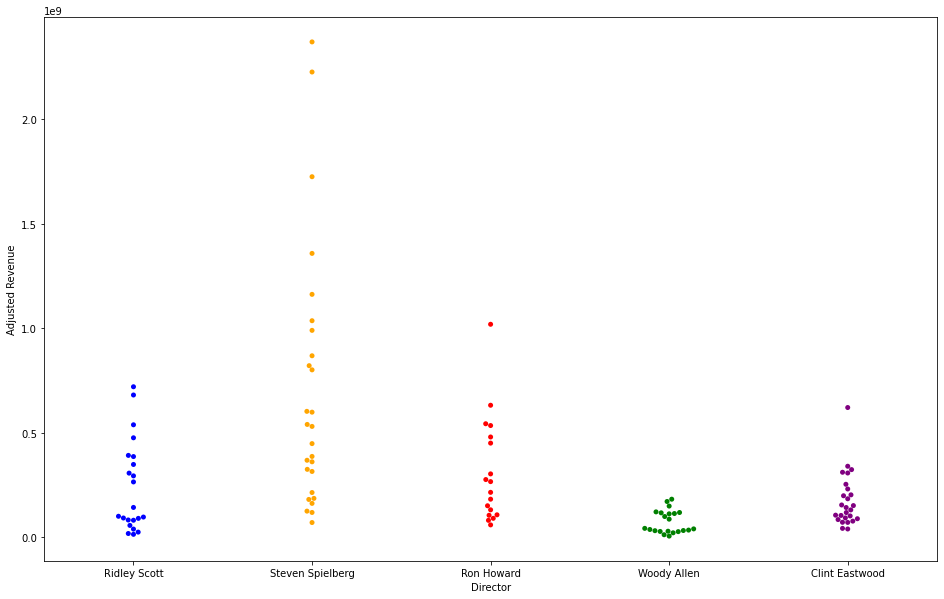

In [77]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=merged_df, x = 'director', y = 'adjusted_revenue',
             palette=['blue', 'orange', 'red', 'green', 'purple'],
             s=5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Director', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)
plt.show()

In [78]:
#Similarly
topgenres_df = pd.DataFrame({'genres': ['Action', 'Adventure', 'Comedy',
                    'Drama', 'Romance']})
merged2_df = films_df.merge(topgenres_df, on='genres')

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


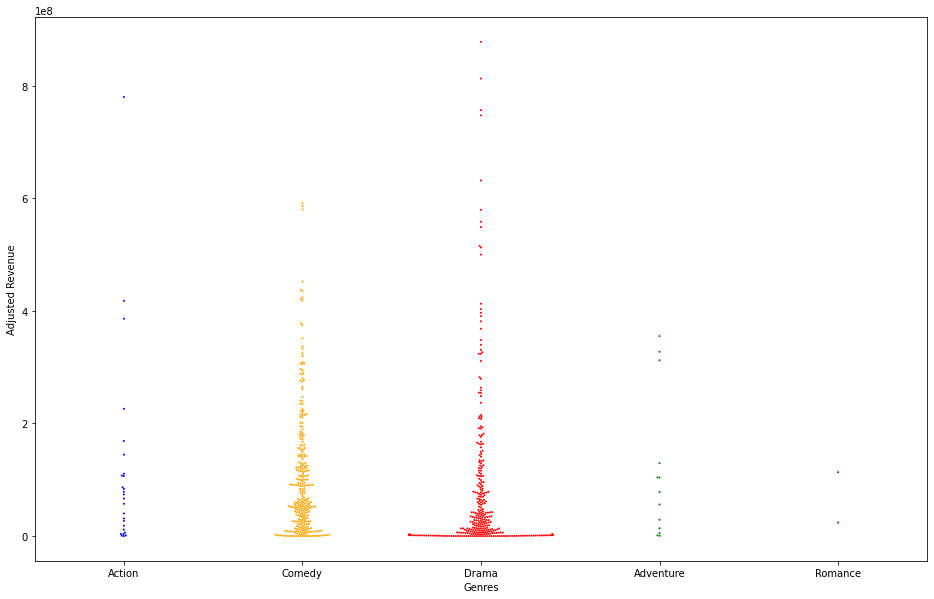

In [79]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=merged2_df, x = 'genres', y = 'adjusted_revenue',
             palette=['blue', 'orange', 'red', 'green', 'purple'],
             s=2)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genres', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)
plt.show()

## Defining the Problem

As mentioned, key stakeholders value a model that accurately predicts a film's success at the box office. Not just to understand their potential 'bottom line', but to better adjust to demographic changes (new trending topics, etc), economic uncertainty, and to understand what key components in the film making process they need to maximize.  
Our goal is to construct model/s that accurately predicts this phenomenon. The first step towards our goal is to understand what features have strong (either positive or negative) relations with revenue at the box office. In this section we analyze these relations.  


In [80]:
films_tmdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.714877e+08,1.730344e+09,1.558856e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.714877e+08,4.326479e+08,2.611602e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.257576e+08,3.375315e+08,2.117738e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,2.286503e+08,2.364448e+09,2.135797e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,2.172178e+08,1.722022e+09,1.504804e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,1966-06-21,74,7.5,1966,6.272454e+07,2.821491e+08,2.194246e+08
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,1966-07-13,46,6.3,1966,2.508981e+07,1.087225e+08,8.363272e+07
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,1966-12-17,36,6.9,1966,3.891430e+07,5.017963e+07,1.126533e+07
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966-12-20,28,7.0,1966,1.003593e+08,1.672654e+08,6.690617e+07


In [81]:
f_train, f_test = train_test_split(films_tmdb.copy(), random_state=1, 
                                   shuffle=True,
                                   test_size=0.2)

In [82]:
f_train.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,104,Crime|Drama|Thriller,Nu Image Films|Millennium Films|Dark Harbor St...,2011-04-01,164,6.5,2011,1.144406e+07,1.445565e+05,-1.129950e+07
7528,13067,tt0419843,0.569416,10000000,17500000,In the Land of Women,Meg Ryan|Kristen Stewart|Adam Brody|JoBeth Wil...,http://www.warnerbros.com/land-women,Jon Kasdan,Get ready to fall,...,97,Romance|Comedy|Drama,Castle Rock Entertainment|Land Films Inc.|Anon...,2007-04-16,82,6.0,2007,1.306875e+07,2.287031e+07,9.801560e+06
9770,5121,tt0072226,0.415866,3000000,12800000,The Sugarland Express,Goldie Hawn|William Atherton|Ben Johnson|Louis...,NaN,Steven Spielberg,Every cop in the state was after her. Everybod...,...,110,Action|Crime|Drama,Universal Pictures|Zanuck/Brown Productions,1974-04-05,33,6.1,1974,1.648905e+07,7.035327e+07,5.386422e+07
3471,55465,tt1268799,1.024786,19000000,35387212,A Very Harold & Kumar Christmas,Neil Patrick Harris|John Cho|Elias Koteas|Dann...,http://haroldandkumar.warnerbros.com,Todd Strauss-Schulson,Christmas comes prematurely.,...,108,Comedy,New Line Cinema|Mandate Pictures,2011-11-04,186,6.0,2011,2.288812e+07,4.262877e+07,1.974065e+07
1533,22947,tt1193138,0.598075,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,...,109,Drama|Romance,Paramount Pictures,2009-09-05,751,6.6,2009,3.157614e+07,2.067227e+08,1.751465e+08


In [83]:
f_train.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2542
director                   1
tagline                  372
keywords                 192
overview                   0
runtime                    0
genres                     0
production_companies      73
release_date               0
vote_count                 0
vote_average               0
year                       0
adjusted_budget            0
adjusted_revenue           0
adjusted_profit            0
dtype: int64

In [84]:
f_train.duplicated().sum()

0

In [85]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'year', 'adjusted_budget',
       'adjusted_revenue', 'adjusted_profit'],
      dtype='object')

### Adjusted Revenue Distribution

Let us begin by analyzing the distribution of the `adjusted_revenue` and `adjusted_budget` values.

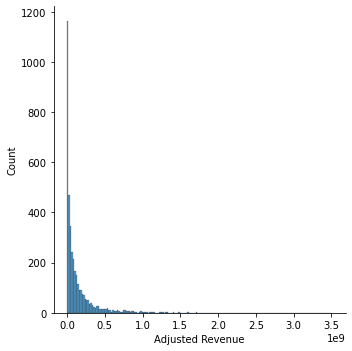

In [86]:
sns.displot(f_train['adjusted_revenue'])
plt.xlabel('Adjusted Revenue', fontsize=10)

plt.show()

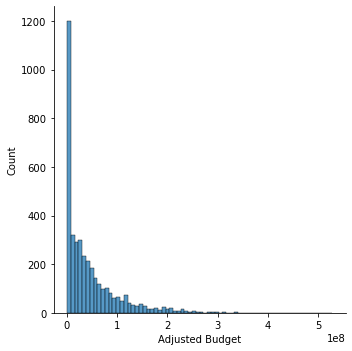

In [87]:
sns.displot(f_train['adjusted_budget'])
plt.xlabel('Adjusted Budget', fontsize=10)

plt.show()

We see that the data is skewed, and hence will not be a good fit for modeling as it may act as an outlier, it has uneven mean and median. Moreover, to linearize the fit as close as possible we want normal distribution. We can use the `log` transformation here.

In [88]:
f_train['log_adjrevenue'] = np.log1p(f_train['adjusted_revenue'])

In [89]:
f_train['log_adjbudget'] = np.log1p(f_train['adjusted_budget'])

In [272]:
f_test['log_adjrevenue'] = np.log1p(f_test['adjusted_revenue'])
f_test['log_adjbudget'] = np.log1p(f_test['adjusted_budget'])

Had to use the numpy `log1p` instead of `log` which calculates $\text{log}(x+1)$, because our budget column has zero values.

<Figure size 864x576 with 0 Axes>

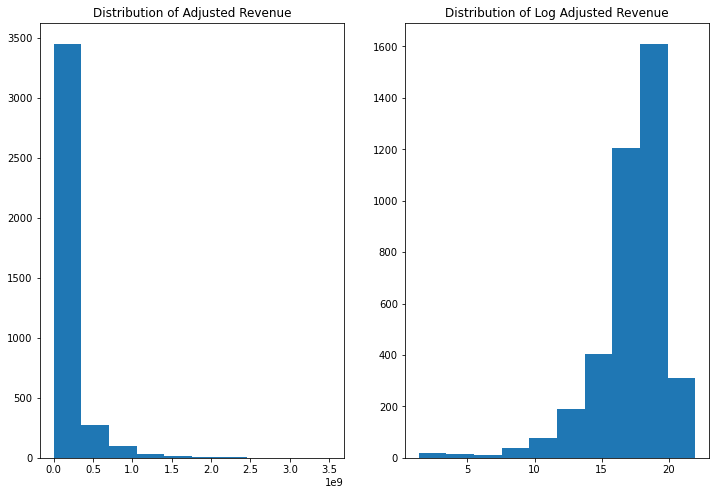

In [91]:
plt.figure(figsize=(12,8))

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplot(1,2,1)
plt.hist(f_train['adjusted_revenue'])
plt.title('Distribution of Adjusted Revenue')
plt.subplot(1,2,2)
plt.hist(f_train['log_adjrevenue'])
plt.title('Distribution of Log Adjusted Revenue')

plt.show()

Thus, applying this transformation makes our data more evenly distributed.

### Adjusted Revenue and Adjusted Budget

Here we consider the realtion between these two features.

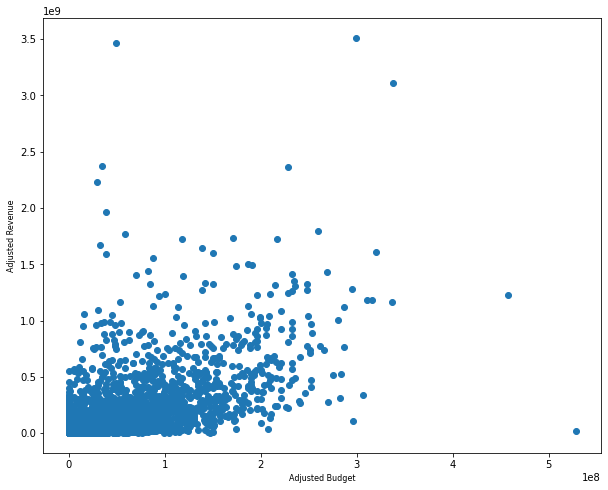

In [92]:
plt.figure(figsize=(10,8))

plt.scatter(f_train.adjusted_budget, f_train.adjusted_revenue)
plt.xlabel('Adjusted Budget', fontsize=8)
plt.ylabel('Adjusted Revenue', fontsize=8)

plt.show()

There appears to be a relationship, but it is not entirely clear. On the other hand, if we plot `log_adjbudget` and `log_adjrevenue` we see a much clearer relation.

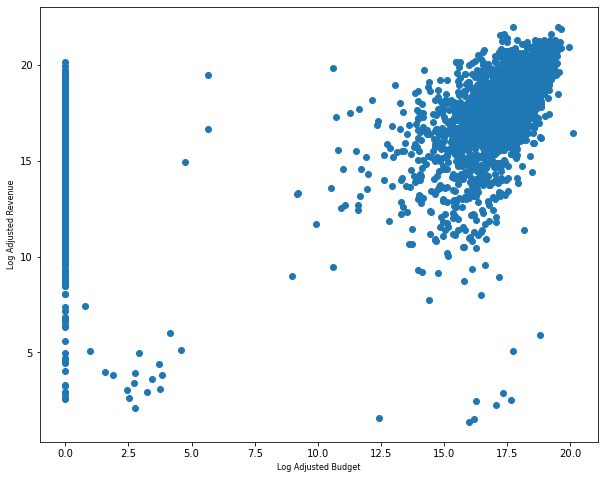

In [279]:
plt.figure(figsize=(10,8))

plt.scatter(f_train.log_adjbudget, f_train.log_adjrevenue)
plt.xlabel('Log Adjusted Budget', fontsize=8)
plt.ylabel('Log Adjusted Revenue', fontsize=8)

plt.show()

We note above that this is where we pay the 'price' of including films who have zero budget.

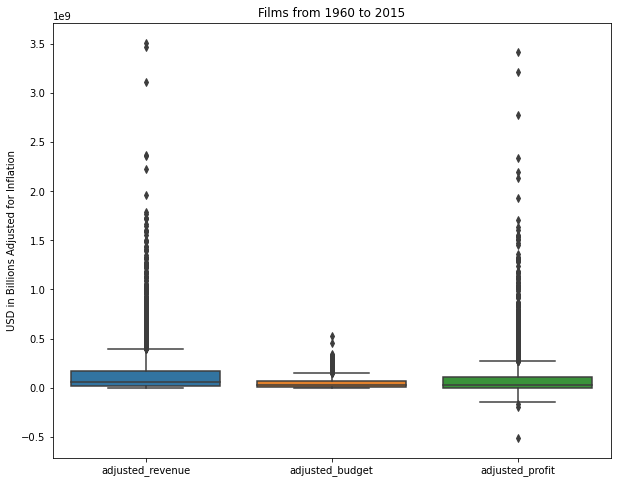

In [94]:
box_cols = ['adjusted_revenue', 'adjusted_budget', 'adjusted_profit']

plt.figure(figsize=(10,8))

ax = sns.boxplot(data=f_train[box_cols])
ax.set_title('Films from 1960 to 2015')
ax.set_ylabel('USD in Billions Adjusted for Inflation')

plt.show()

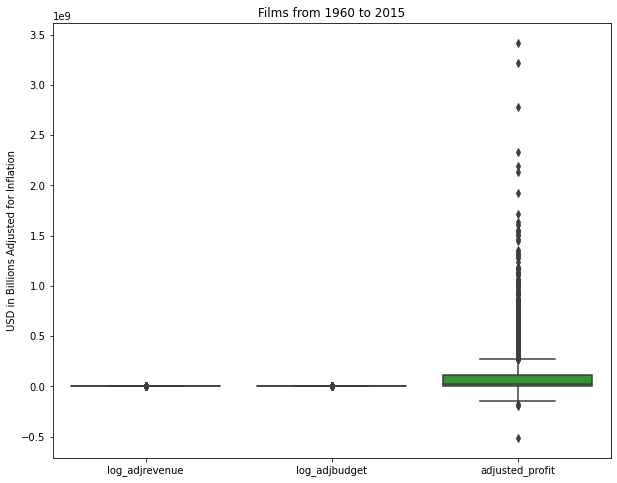

In [95]:
box_cols = ['log_adjrevenue', 'log_adjbudget', 'adjusted_profit']

plt.figure(figsize=(10,8))

ax = sns.boxplot(data=f_train[box_cols])
ax.set_title('Films from 1960 to 2015')
ax.set_ylabel('USD in Billions Adjusted for Inflation')

plt.show()

### Dummy Variables
We now use `skelearn`'s `MultiLabelBinarizer` to perform the one-hot-encode for all the relevant columns on the __train and test__ datasets.

In [96]:
from sklearn.preprocessing import MultiLabelBinarizer

In [97]:
mlb = MultiLabelBinarizer()

### Cast Column

In [98]:
f_train['cast'] = f_train['cast'].fillna('Unknown')

In [99]:
lst = f_train['cast'].apply(lambda x: x.split('|'))


In [100]:
dumvar = mlb.fit_transform(lst)

In [101]:
f_train[mlb.classes_] = dumvar

C:\Users\rbg32\anaconda3\lib\site-packages\pandas\core\frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [102]:
f_train.columns[22:]

Index(['log_adjrevenue', 'log_adjbudget', '50 Cent', 'A Martinez',
       'A. Michael Baldwin', 'A.J. Cook', 'AJ Bowen', 'Aaliyah', 'Aamir Khan',
       'Aaran Thomas',
       ...
       'ZoÃ« Bell', 'ZoÃ« Borde', 'ZoÃ« Kravitz', 'Zulay Henao',
       'Zuleikha Robinson', 'Ãngela Molina', 'Ã“lafur Darri Ã“lafsson',
       'Ã‰lisabeth Bourgine', 'Äá»— Thá»‹ Háº£i Yáº¿n',
       'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ'],
      dtype='object', length=7423)

In [103]:
len(f_train.columns[22:])

7423

__Cast Columns:__
Individual actor/actress columns are 22 - 7442

In [104]:
f_test['cast'] = f_test['cast'].fillna('Unknown')

In [105]:
tlst = f_test['cast'].apply(lambda x: x.split('|'))

In [106]:
tdumvar = mlb.fit_transform(tlst)

In [107]:
f_test[mlb.classes_] = tdumvar

### Genres Column

In [108]:
f_train['genres'] = f_train['genres'].fillna('Unknown')

In [109]:
lst = f_train['genres'].apply(lambda x: x.split('|'))

In [110]:
dumvar2 = mlb.fit_transform(lst)

In [111]:
f_train[mlb.classes_] = dumvar2

In [112]:
f_test['genres'] = f_test['genres'].fillna('Unknown')

In [113]:
tlst = f_test['genres'].apply(lambda x: x.split('|'))

In [114]:
tdumvar2 = mlb.fit_transform(tlst)

In [115]:
f_test[mlb.classes_] = tdumvar2

In [116]:
print(f_train.columns[7445: 7465])
print(len(f_train.columns[7445:]))

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')
20


__Genres Col's:__ Location is columns 7445 - 7465.

### Directors

In [117]:
f_train['director'] = f_train['director'].fillna('Unknown')

In [118]:
lst = f_train['director'].apply(lambda x: x.split('|'))

In [119]:
dumvar3 = mlb.fit_transform(lst)

In [120]:
f_train[mlb.classes_] = dumvar3

In [121]:
f_test['director'] = f_test['director'].fillna('Unknown')

In [122]:
tlst = f_test['director'].apply(lambda x: x.split('|'))

In [123]:
tdumvar3 = mlb.fit_transform(tlst)

In [124]:
f_test[mlb.classes_] = tdumvar3

In [125]:
print(f_train.columns[7465:])
print(len(f_train.columns[7465:]))

Index(['A.R. Murugadoss', 'Aaron Blaise', 'Aaron Moorhead', 'Aaron Norris',
       'Aaron Seltzer', 'Abbas Tyrewala', 'Abe Sylvia', 'Abel Ferrara',
       'Adam Green', 'Adam Kassen',
       ...
       'Yann Demange', 'Yaron Zilberman', 'Yorgos Lanthimos',
       'Yoshihiro Nishimura', 'YÃ»dai Yamaguchi', 'Zach Helm', 'Zack Snyder',
       'Zal Batmanglij', 'Zalman King', 'Zillah Bowes'],
      dtype='object', length=1820)
1820


__Director Col's:__ Column 7465 - col 9285.

Note that since production companies tend to begin the production process of any film, then having the feature `production_companies` as input in our model will not be relevant. A production company would not give a film idea to a competitor simply becuase the competitor tends to have higher box office revenues.

In [126]:
f_train.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,...,Yann Demange,Yaron Zilberman,Yorgos Lanthimos,Yoshihiro Nishimura,YÃ»dai Yamaguchi,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zillah Bowes
count,3879.000000,3879.000000,3.879000e+03,3.879000e+03,3879.000000,3879.000000,3879.000000,3879.000000,3.879000e+03,3.879000e+03,...,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000
mean,43910.372261,1.033517,2.969161e+07,9.098284e+07,107.993813,436.963135,6.141222,2000.817221,4.391393e+07,1.452083e+08,...,0.000258,0.000258,0.000258,0.000258,0.000258,0.000258,0.001289,0.000258,0.000258,0.000258
std,71500.767896,1.273113,4.046369e+07,1.679206e+08,21.730651,812.694287,0.801880,11.613527,5.435291e+07,2.523337e+08,...,0.016056,0.016056,0.016056,0.016056,0.016056,0.016056,0.035884,0.016056,0.016056,0.016056
min,5.000000,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.945326e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8365.500000,0.386532,1.325000e+06,7.809262e+06,95.000000,46.000000,5.600000,1993.000000,2.640388e+06,1.339992e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12139.000000,0.670274,1.500000e+07,3.191279e+07,104.000000,147.000000,6.200000,2004.000000,2.531554e+07,5.575430e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43572.500000,1.204989,4.000000e+07,1.005074e+08,117.000000,433.000000,6.700000,2010.000000,6.254064e+07,1.666147e+08,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,5.281315e+08,3.513169e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us break down above into smaller subsets.

In [127]:
f_train[['id', 'popularity', 'director', 'runtime', 'year', 'adjusted_budget', 'adjusted_revenue']].describe()

,id,popularity,runtime,year,adjusted_budget,adjusted_revenue
count,3879.000000,3879.000000,3879.000000,3879.000000,3.879000e+03,3.879000e+03
mean,43910.372261,1.033517,107.993813,2000.817221,4.391393e+07,1.452083e+08
std,71500.767896,1.273113,21.730651,11.613527,5.435291e+07,2.523337e+08
min,5.000000,0.001117,15.000000,1960.000000,0.000000e+00,2.945326e+00
25%,8365.500000,0.386532,95.000000,1993.000000,2.640388e+06,1.339992e+07
50%,12139.000000,0.670274,104.000000,2004.000000,2.531554e+07,5.575430e+07
75%,43572.500000,1.204989,117.000000,2010.000000,6.254064e+07,1.666147e+08
max,417859.000000,32.985763,705.000000,2015.000000,5.281315e+08,3.513169e+09


In [128]:
f_train[['vote_count', 'adjusted_budget', 'adjusted_revenue']].describe()

,vote_count,adjusted_budget,adjusted_revenue
count,3879.000000,3.879000e+03,3.879000e+03
mean,436.963135,4.391393e+07,1.452083e+08
std,812.694287,5.435291e+07,2.523337e+08
min,10.000000,0.000000e+00,2.945326e+00
25%,46.000000,2.640388e+06,1.339992e+07
50%,147.000000,2.531554e+07,5.575430e+07
75%,433.000000,6.254064e+07,1.666147e+08
max,9767.000000,5.281315e+08,3.513169e+09


In [129]:
f_train.iloc[:, 10:24].describe()

,runtime,vote_count,vote_average,year,adjusted_budget,adjusted_revenue,adjusted_profit,log_adjrevenue,log_adjbudget
count,3879.000000,3879.000000,3879.000000,3879.000000,3.879000e+03,3.879000e+03,3.879000e+03,3879.000000,3879.000000
mean,107.993813,436.963135,6.141222,2000.817221,4.391393e+07,1.452083e+08,1.012944e+08,17.247917,13.577214
std,21.730651,812.694287,0.801880,11.613527,5.435291e+07,2.523337e+08,2.242167e+08,2.679361,7.150412
min,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.945326e+00,-5.143534e+08,1.372532,0.000000
25%,95.000000,46.000000,5.600000,1993.000000,2.640388e+06,1.339992e+07,1.247440e+05,16.410757,14.786386
50%,104.000000,147.000000,6.200000,2004.000000,2.531554e+07,5.575430e+07,2.738148e+07,17.836465,17.046929
75%,117.000000,433.000000,6.700000,2010.000000,6.254064e+07,1.666147e+08,1.086878e+08,18.931191,17.951327
max,705.000000,9767.000000,8.400000,2015.000000,5.281315e+08,3.513169e+09,3.417969e+09,21.979784,20.084856


In [130]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'Yann Demange', 'Yaron Zilberman', 'Yorgos Lanthimos',
       'Yoshihiro Nishimura', 'YÃ»dai Yamaguchi', 'Zach Helm', 'Zack Snyder',
       'Zal Batmanglij', 'Zalman King', 'Zillah Bowes'],
      dtype='object', length=9285)

In [131]:
print('Mean', f_train.groupby('runtime').adjusted_profit.mean())
print()
print('Median', f_train.groupby('runtime').adjusted_profit.median())
print()
print('Mean', f_train.groupby('director').adjusted_profit.mean())
print()
print('Median', f_train.groupby('director').adjusted_profit.median())
print()
print('Mean', f_train.groupby('year').adjusted_profit.mean())
print()
print('Median', f_train.groupby('year').adjusted_profit.median())
print()
print('Mean', f_train.groupby('adjusted_budget').adjusted_profit.mean())
print()
print('Median', f_train.groupby('adjusted_budget').adjusted_profit.median())

Mean runtime
15    -7.363315e+00
26     4.897048e+07
40     9.314650e+06
42    -2.517066e+05
44     1.270856e+08
           ...     
219   -1.332346e+08
248    2.358590e+08
254    4.688062e+07
338   -2.128522e+07
705    1.912549e+08
Name: adjusted_profit, Length: 142, dtype: float64

Median runtime
15    -7.363315e+00
26     4.897048e+07
40     9.314650e+06
42    -2.517066e+05
44     1.270856e+08
           ...     
219   -1.332346e+08
248    2.358590e+08
254    4.688062e+07
338   -2.128522e+07
705    1.912549e+08
Name: adjusted_profit, Length: 142, dtype: float64

Mean director
A.R. Murugadoss                  8.419712e+07
Aaron Blaise|Robert Walker      -1.472659e+08
Aaron Norris                     8.930705e+06
Aaron Seltzer|Jason Friedberg    3.837186e+07
Abbas Tyrewala                   1.107526e+07
                                     ...     
Zach Helm                        9.079467e+07
Zack Snyder                      2.260952e+08
Zal Batmanglij                  -4.767265e+06


In [132]:
print(f_train.groupby('year').adjusted_profit.mean().shape)
print(type(f_train.groupby('year').adjusted_profit.mean().shape))

(56,)
<class 'tuple'>


### Summary

We have several summary statistics to assist in our analysis. For example, we see that the film with highest adjusted revenue is <i> Avatar </i> ($\$ 2,827,123,750$ USD) and as expected the film also has a relatively high adjusted budget ($\$ 240,886,902.9$ USD). But it certainly is not the film with the highest adjusted budget, films such as <i> Pirates of the Caribean: On Stranger Tides, Avengers: Age of Ultron</i> among others (there are in fact a total of 16 other films with higher budgets), have higher adjusted budgets. Hence, while we can expect `adjusted_budget` to be a potentially strong predictor for `adjusted_revenue`, we certainly see that it is not a perfect predictor.

We also see that `vote_count` seems to be correlated with `adjusted_revenue`, using <i> Avatar</i> as an example again, we see that it is the third highest film by vote count.

## Correlations:

We now examine the correlations between the variable we want to predict (`adjusted_revenue` or `log_adjrevenue`) and our other features.

In [133]:
f_train[['log_adjrevenue', 'log_adjbudget', 'popularity', 'runtime', 'vote_average', 'adjusted_profit', 
         'year', 'vote_count']].corr()['log_adjrevenue'].sort_values()

year              -0.194433
vote_average       0.176024
runtime            0.234309
popularity         0.368027
vote_count         0.387198
log_adjbudget      0.445423
adjusted_profit    0.468193
log_adjrevenue     1.000000
Name: log_adjrevenue, dtype: float64

In [134]:
f_train[['adjusted_revenue', 'adjusted_budget', 'popularity', 'runtime', 'vote_average', 
         'year', 'adjusted_profit', 'vote_count']].corr()['adjusted_revenue'].sort_values()

year               -0.085022
vote_average        0.241939
runtime             0.258917
adjusted_budget     0.596183
popularity          0.606629
vote_count          0.690527
adjusted_profit     0.980879
adjusted_revenue    1.000000
Name: adjusted_revenue, dtype: float64

As expected, the `adjusted_profit` feature is highly correlated with `adjusted_revenue` as it is not independent from the adjusted profit.

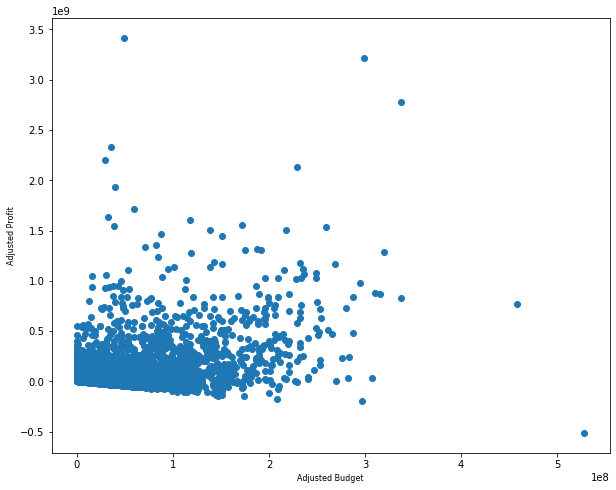

In [135]:
plt.figure(figsize=(10,8))

plt.scatter(f_train.adjusted_budget, f_train.adjusted_profit)
plt.xlabel('Adjusted Budget', fontsize=8)
plt.ylabel('Adjusted Profit', fontsize=8)

plt.show()

Now we consider the relation among other potential features. First we recall what the columns of our training set are.

In [136]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'Yann Demange', 'Yaron Zilberman', 'Yorgos Lanthimos',
       'Yoshihiro Nishimura', 'YÃ»dai Yamaguchi', 'Zach Helm', 'Zack Snyder',
       'Zal Batmanglij', 'Zalman King', 'Zillah Bowes'],
      dtype='object', length=9285)

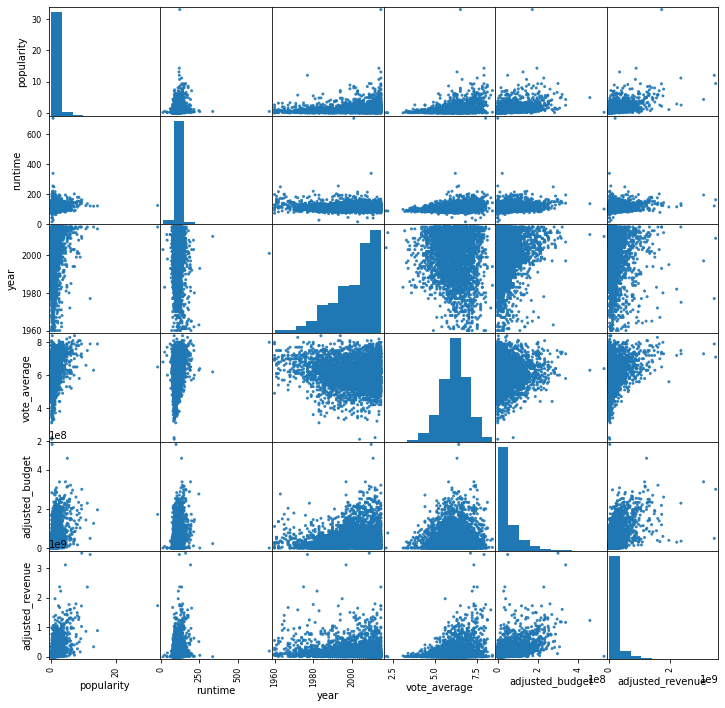

In [137]:
scatter_matrix(f_train[['popularity', 'runtime', 'year', 'vote_average',
                      'adjusted_budget', 'adjusted_revenue']], figsize=(12,12), alpha=0.9)

plt.show()

We note that there seems to be a relation (not necessarily linear) between `adjusted_revenue` and `year`, `adjusted_budget`, and `vote_average`. 

Let us try with the transformed data:

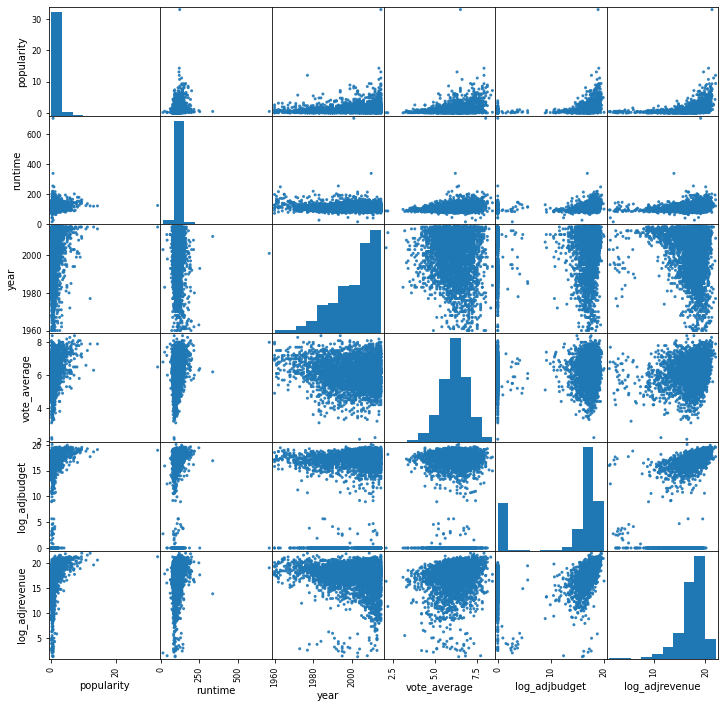

In [138]:
scatter_matrix(f_train[['popularity', 'runtime', 'year', 'vote_average',
                      'log_adjbudget', 'log_adjrevenue']], figsize=(12,12), alpha=0.9)

plt.show()

So far, it looks like we relations between the value we want to predict, `adjusted_revenue`, (or, respectively, `log_adjrevenue`) and the features: 
- `runtime`
- `vote_average`
- `popularity`
- `adjusted_budget` (and `log_adjbudget` respectively)

In [139]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'Yann Demange', 'Yaron Zilberman', 'Yorgos Lanthimos',
       'Yoshihiro Nishimura', 'YÃ»dai Yamaguchi', 'Zach Helm', 'Zack Snyder',
       'Zal Batmanglij', 'Zalman King', 'Zillah Bowes'],
      dtype='object', length=9285)

## Genres, Actors, and Directors

Now we consider the relations between `adjustes_revenue` and `genres`, `actors`, and `director`.

Moreover, in a previous section we showed the top (5, and 10) genres, top (20 and 50) actors, and the top (5 and 10) directors. Given that we only want to determine if there is a predictive relation between `adjusted_revenue` and these features, it is enough to consider subsets of these. Hence we will create DataFrame objects for: 

- Top 5 Directors
- Top 8 Genres

We then concat these with our training set in order to consider potential relations. 

In [140]:
f_train.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Yann Demange,Yaron Zilberman,Yorgos Lanthimos,Yoshihiro Nishimura,YÃ»dai Yamaguchi,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zillah Bowes
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,0,0,0,0,0,0,0,0,0,0
7528,13067,tt0419843,0.569416,10000000,17500000,In the Land of Women,Meg Ryan|Kristen Stewart|Adam Brody|JoBeth Wil...,http://www.warnerbros.com/land-women,Jon Kasdan,Get ready to fall,...,0,0,0,0,0,0,0,0,0,0
9770,5121,tt0072226,0.415866,3000000,12800000,The Sugarland Express,Goldie Hawn|William Atherton|Ben Johnson|Louis...,0,Steven Spielberg,Every cop in the state was after her. Everybod...,...,0,0,0,0,0,0,0,0,0,0
3471,55465,tt1268799,1.024786,19000000,35387212,A Very Harold & Kumar Christmas,Neil Patrick Harris|John Cho|Elias Koteas|Dann...,http://haroldandkumar.warnerbros.com,Todd Strauss-Schulson,Christmas comes prematurely.,...,0,0,0,0,0,0,0,0,0,0
1533,22947,tt1193138,0.598075,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,9053,tt0398913,0.458112,21000000,480314,DOA: Dead or Alive,Jaime Pressly|Devon Aoki|Holly Valance|Sarah C...,0,Corey Yuen Kwai,They're the ultimate fighters. They've got the...,...,0,0,0,0,0,0,0,0,0,0
6556,920,tt0317219,3.941265,120000000,461983149,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,http://disney.go.com/disneyvideos/animatedfilm...,John Lasseter|Joe Ranft,Ahhh... it's got that new movie smell.,...,0,0,0,0,0,0,0,0,0,0
2430,492,tt0120601,1.328465,13000000,22863596,Being John Malkovich,John Cusack|Cameron Diaz|Catherine Keener|John...,0,Spike Jonze,Ever wanted to be someone else? Now you can.,...,0,0,0,0,0,0,0,0,0,0
8944,14373,tt0082250,0.464188,2,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,0,Michael Winner,First His Wife. Now His Daughter. It's Time To...,...,0,0,0,0,0,0,0,0,0,0


In [141]:
f_train.drop(f_train[f_train.revenue == 0].index, inplace=True)

In [142]:
f_train = f_train[f_train['revenue'].notna()]

In [143]:
f_train

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Yann Demange,Yaron Zilberman,Yorgos Lanthimos,Yoshihiro Nishimura,YÃ»dai Yamaguchi,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zillah Bowes
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,0,0,0,0,0,0,0,0,0,0
7528,13067,tt0419843,0.569416,10000000,17500000,In the Land of Women,Meg Ryan|Kristen Stewart|Adam Brody|JoBeth Wil...,http://www.warnerbros.com/land-women,Jon Kasdan,Get ready to fall,...,0,0,0,0,0,0,0,0,0,0
9770,5121,tt0072226,0.415866,3000000,12800000,The Sugarland Express,Goldie Hawn|William Atherton|Ben Johnson|Louis...,NaN,Steven Spielberg,Every cop in the state was after her. Everybod...,...,0,0,0,0,0,0,0,0,0,0
3471,55465,tt1268799,1.024786,19000000,35387212,A Very Harold & Kumar Christmas,Neil Patrick Harris|John Cho|Elias Koteas|Dann...,http://haroldandkumar.warnerbros.com,Todd Strauss-Schulson,Christmas comes prematurely.,...,0,0,0,0,0,0,0,0,0,0
1533,22947,tt1193138,0.598075,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,9053,tt0398913,0.458112,21000000,480314,DOA: Dead or Alive,Jaime Pressly|Devon Aoki|Holly Valance|Sarah C...,NaN,Corey Yuen Kwai,They're the ultimate fighters. They've got the...,...,0,0,0,0,0,0,0,0,0,0
6556,920,tt0317219,3.941265,120000000,461983149,Cars,Owen Wilson|Paul Newman|Bonnie Hunt|Larry the ...,http://disney.go.com/disneyvideos/animatedfilm...,John Lasseter|Joe Ranft,Ahhh... it's got that new movie smell.,...,0,0,0,0,0,0,0,0,0,0
2430,492,tt0120601,1.328465,13000000,22863596,Being John Malkovich,John Cusack|Cameron Diaz|Catherine Keener|John...,NaN,Spike Jonze,Ever wanted to be someone else? Now you can.,...,0,0,0,0,0,0,0,0,0,0
8944,14373,tt0082250,0.464188,2,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,NaN,Michael Winner,First His Wife. Now His Daughter. It's Time To...,...,0,0,0,0,0,0,0,0,0,0


In [144]:
fcopy_test = f_test.copy()

In [145]:
fcopy_test

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Wim Wenders,Wolfgang Petersen,Wolfgang Reitherman,Xavier Dolan,Xavier Gens,Yvan Attal,Zack Snyder,Ãlex de la Iglesia,Ã‰mile Gaudreault,Ã€lex Pastor
10533,12662,tt0091799,0.384232,0,14481606,Psycho III,Anthony Perkins|Diana Scarwid|Jeff Fahey|Rober...,NaN,Anthony Perkins,Norman Bates is back to normal. But Mother's o...,...,0,0,0,0,0,0,0,0,0,0
2915,6972,tt0455824,1.468543,130000000,49554002,Australia,Nicole Kidman|Hugh Jackman|Essie Davis|David W...,NaN,Baz Luhrmann,Welcome to Australia!,...,0,0,0,0,0,0,0,0,0,0
9468,10131,tt0095742,0.783040,7000000,72500000,A Nightmare on Elm Street 4: The Dream Master,Robert Englund|Tuesday Knight|Ken Sagoes|Rodne...,NaN,Renny Harlin,Terror beyond your wildest dreams.,...,0,0,0,0,0,0,0,0,0,0
5750,146304,tt2083355,0.332741,17000000,71625195,The Best Man Holiday,Terrence Howard|Harold Perrineau|Morris Chestn...,NaN,Malcolm D. Lee,Times change. Friendship doesn't.,...,0,0,0,0,0,0,0,0,0,0
5582,77805,tt1426329,0.765495,10000000,1585582,Lovelace,Amanda Seyfried|Peter Sarsgaard|Hank Azaria|Ad...,NaN,Rob Epstein|Jeffrey Friedman,The truth goes deeper than you think.,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,935,tt0057012,2.210475,1800000,9440272,Dr. Strangelove or: How I Learned to Stop Worr...,Peter Sellers|George C. Scott|Sterling Hayden|...,NaN,Stanley Kubrick,The hot-line suspense comedy,...,0,0,0,0,0,0,0,0,0,0
10531,11300,tt0091983,0.385622,0,8362969,Something Wild,Jeff Daniels|Melanie Griffith|Ray Liotta|Marga...,NaN,Jonathan Demme,Something Different Something Daring Something...,...,0,0,0,0,0,0,0,0,0,0
6369,17113,tt0357110,0.406323,1500000,712294,The Ballad of Jack and Rose,Daniel Day-Lewis|Camilla Belle|Catherine Keene...,NaN,Rebecca Miller,"Selfhood begins with a walking away, and love ...",...,0,0,0,0,0,0,0,0,0,0
854,210479,tt2692904,0.602735,2000000,4635300,Locke,Tom Hardy|Ruth Wilson|Andrew Scott|Olivia Colm...,NaN,Steven Knight,No turning back,...,0,0,0,0,0,0,0,0,0,0


In [146]:
f_test = pd.concat(frames, axis=1)

In [147]:
f_test.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Zach Braff,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zana Briski,Zillah Bowes,Ãlex de la Iglesia,Ã‰mile Gaudreault,Ã€lex Pastor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,0,Mike Nichols,You are cordially invited to George and Martha...,...,0,0,0,0,0,0,0,0,0,0
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,0,Alfred Hitchcock,It tears you apart with suspense!,...,0,0,0,0,0,0,0,0,0,0
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,0,Howard Hawks,It's the Big One with the Big Two,...,0,0,0,0,0,0,0,0,0,0
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,0,Robert Wise,This is the heroic story of the men on the U.S...,...,0,0,0,0,0,0,0,0,0,0


In [148]:
f_test.drop(f_test[f_test.revenue == 0].index, inplace=True)

In [149]:
f_test = f_test[f_test['revenue'].notna()]

In [150]:
f_test

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Zach Braff,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zana Briski,Zillah Bowes,Ãlex de la Iglesia,Ã‰mile Gaudreault,Ã€lex Pastor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,0,0,0,0,0,0,0,0,0,0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,0,0,0,0,0,0,0,0,0,0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,0,0,0,0,0,0,0,0,0,0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,0,0,0,0,0,0,0,0,0,0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,0,0,0,0,0,0,0,0,0,0
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,0,0,0,0,0,0,0,0,0,0
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,0,0,0,0,0,0,0,0,0,0
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,0,0,0,0,0,0,0,0,0,0


In [151]:
topdirector_df = pd.DataFrame({'director': ['Steven Spielberg', 'Clint Eastwood', 'Woody Allen',
                    'Ridley Scott', 'Ron Howard']})

In [152]:
merged_f_train = f_train.merge(topdirector_df, on='director')

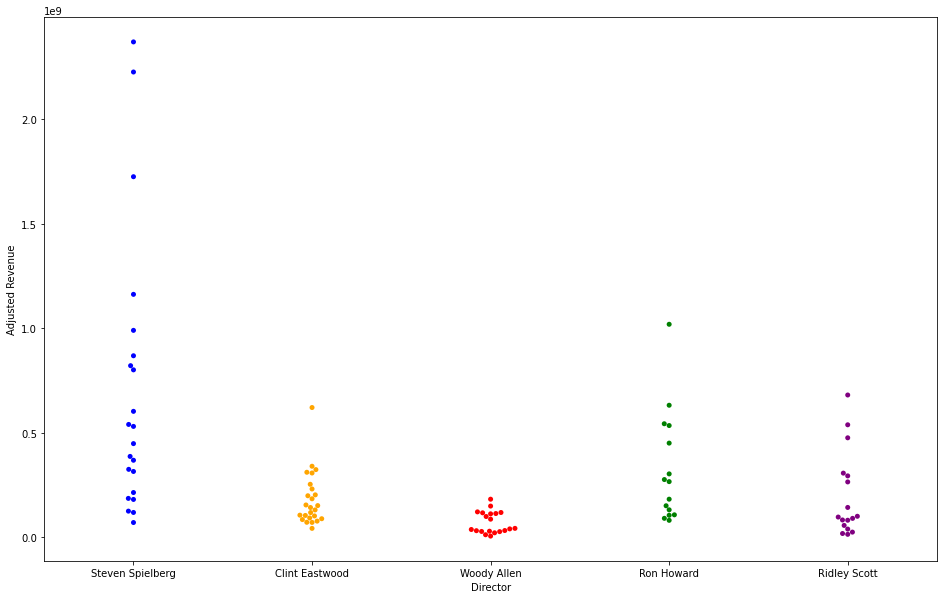

In [153]:
plt.figure(figsize=(16,10))

sns.swarmplot(data=merged_f_train, x = 'director', y = 'adjusted_revenue',
             palette=['blue', 'orange', 'red', 'green', 'purple'],
             s=5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Director', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)

plt.show()

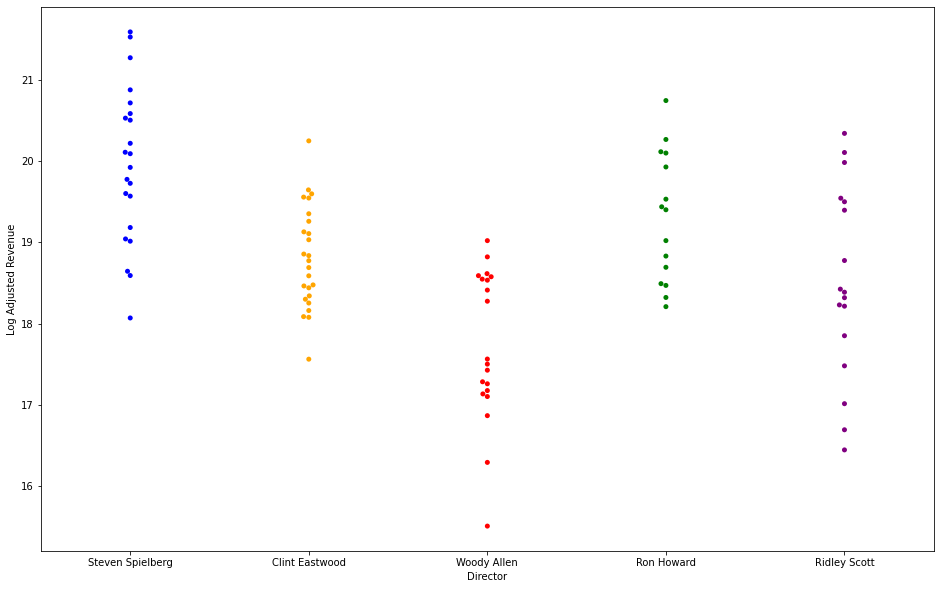

In [154]:
plt.figure(figsize=(16,10))
sns.swarmplot(data=merged_f_train, x = 'director', y = 'log_adjrevenue',
             palette=['blue', 'orange', 'red', 'green', 'purple'],
             s=5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Director', fontsize=10)
plt.ylabel('Log Adjusted Revenue', fontsize=10)

plt.show()

In [155]:
f_train[['adjusted_revenue', 'adjusted_budget', 'Steven Spielberg', 'Clint Eastwood', 'Woody Allen',
        'Ron Howard', 'Ridley Scott', 'Martin Scorsese', 'Tim Burton']].corr()['adjusted_revenue'].sort_values()

Woody Allen        -0.021416
Martin Scorsese     0.007893
Clint Eastwood      0.011211
Ridley Scott        0.012940
Ron Howard          0.044342
Tim Burton          0.052437
Steven Spielberg    0.165735
adjusted_budget     0.596183
adjusted_revenue    1.000000
Name: adjusted_revenue, dtype: float64

We see that the linear relationship between `adjusted_revenue` and top directors has small $|r|$ values, hence not __strong__ predictors, but they do have a relation.

Now let us consider with `log_adjrevenue`:

In [156]:
f_train[['log_adjrevenue', 'adjusted_budget', 'Steven Spielberg', 'Clint Eastwood', 'Woody Allen',
        'Ron Howard', 'Ridley Scott', 'Martin Scorsese', 'Tim Burton']].corr()['log_adjrevenue'].sort_values()

Woody Allen         0.012830
Martin Scorsese     0.019916
Ridley Scott        0.031283
Tim Burton          0.038981
Clint Eastwood      0.047084
Ron Howard          0.047784
Steven Spielberg    0.076444
adjusted_budget     0.487594
log_adjrevenue      1.000000
Name: log_adjrevenue, dtype: float64

We conclude the same.

__Similarly:__

In [157]:
topgenres_df = pd.DataFrame({'genres': ['Action', 'Adventure', 'Comedy',
                    'Drama', 'Romance', 'Thriller', 'Science Fiction', 'Horror',]})
merged2_f_train = f_train.merge(topgenres_df, on='genres')

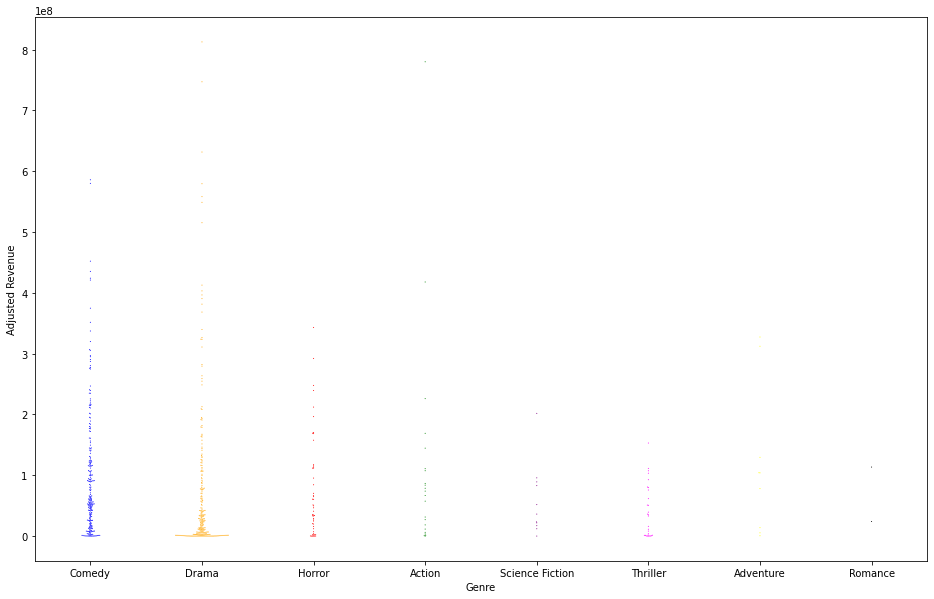

In [158]:
plt.figure(figsize=(16,10))

sns.swarmplot(data=merged2_f_train, x = 'genres', y = 'adjusted_revenue',
             palette=['blue', 'orange', 'red', 'green', 'purple', 'magenta', 'yellow', 'black'],
             s=1)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)

plt.show()

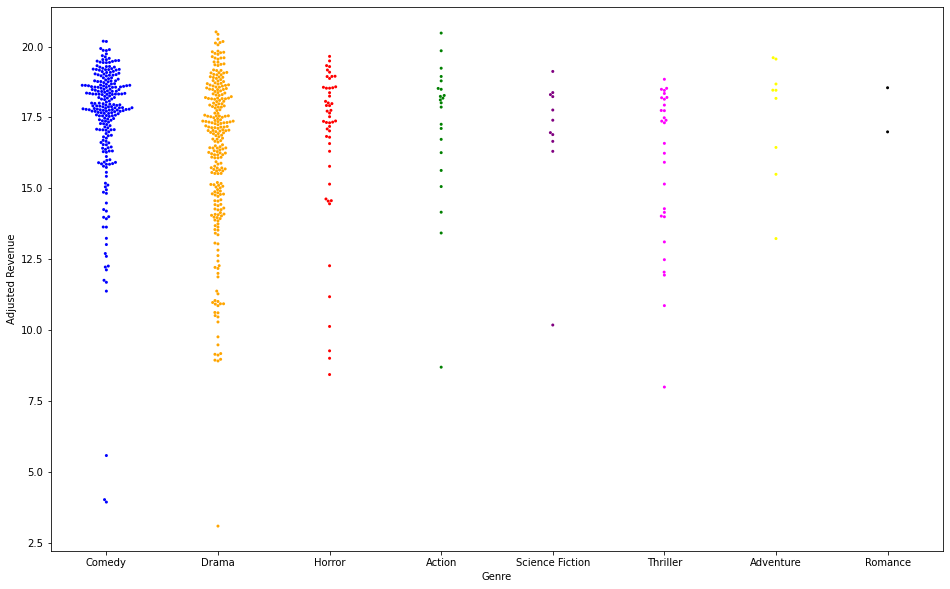

In [159]:
plt.figure(figsize=(16,10))

sns.swarmplot(data=merged2_f_train, x = 'genres', y = 'log_adjrevenue',
             palette=['blue', 'orange', 'red', 'green', 'purple', 'magenta', 'yellow', 'black'],
             s=3)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Genre', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)

plt.show()

In [160]:
top10_genre_rev_df1 = merged2_f_train.groupby(['genres'], as_index=False)['adjusted_revenue'].sum().sort_values(by=['adjusted_revenue'])
top10_genre_rev_df1

,genres,adjusted_revenue
5,Romance,1.375010e+08
6,Science Fiction,6.321131e+08
1,Adventure,1.075245e+09
7,Thriller,1.156679e+09
0,Action,2.503233e+09
4,Horror,3.796403e+09
3,Drama,1.981081e+10
2,Comedy,2.382610e+10


In [161]:
top10_genre_logrev_df = merged2_f_train.groupby(['genres'], 
                           as_index=False)['log_adjrevenue'].sum().sort_values(by=['log_adjrevenue'])
print(top10_genre_logrev_df)
print(top10_genre_logrev_df['log_adjrevenue'].max())

            genres  log_adjrevenue
5          Romance       35.540291
1        Adventure      158.113940
6  Science Fiction      186.219760
0           Action      377.365464
7         Thriller      459.030023
4           Horror      835.695539
3            Drama     4269.296306
2           Comedy     4275.019853
4275.0198531851


In [162]:
x = merged2_f_train['genres']
y = merged2_f_train['log_adjrevenue']

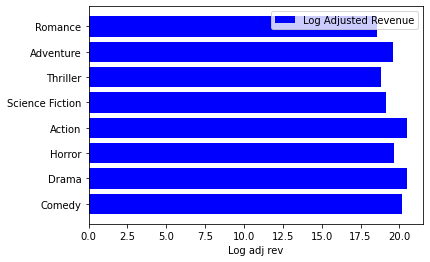

In [163]:
plt.barh(x, y, color='blue', label='Log Adjusted Revenue')
plt.legend()
plt.xlabel('Log adj rev')

plt.show()

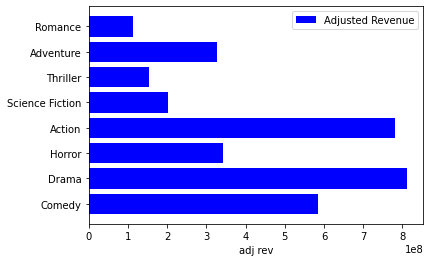

In [164]:
x_1 = merged2_f_train['genres']
y_1 = merged2_f_train['adjusted_revenue']
plt.barh(x_1, y_1, color='blue', label='Adjusted Revenue')
plt.legend()
plt.xlabel('adj rev')
plt.show()

In [165]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'Yann Demange', 'Yaron Zilberman', 'Yorgos Lanthimos',
       'Yoshihiro Nishimura', 'YÃ»dai Yamaguchi', 'Zach Helm', 'Zack Snyder',
       'Zal Batmanglij', 'Zalman King', 'Zillah Bowes'],
      dtype='object', length=9285)

In [166]:
f_train[['adjusted_revenue', 'adjusted_budget', 'Comedy', 'Drama', 'Horror',
        'Action', 'Science Fiction', 'Thriller', 'Adventure', 'Romance']].corr()['adjusted_revenue'].sort_values()

Drama              -0.143660
Horror             -0.083379
Comedy             -0.056087
Romance            -0.048633
Thriller            0.002914
Science Fiction     0.126213
Action              0.180533
Adventure           0.306629
adjusted_budget     0.596183
adjusted_revenue    1.000000
Name: adjusted_revenue, dtype: float64

In contrast to top directors, genres are stronger predictors of `adjusted_revenue`. We can also see this with `log_adjrevenue`:

In [167]:
f_train[['log_adjrevenue', 'Comedy', 'Drama', 'Horror',
        'Action', 'Science Fiction', 'Thriller', 'Adventure', 'Romance']].corr()['log_adjrevenue'].sort_values()

Drama             -0.106918
Horror            -0.081546
Romance           -0.032935
Comedy             0.008617
Thriller           0.023018
Science Fiction    0.080108
Action             0.155355
Adventure          0.210723
log_adjrevenue     1.000000
Name: log_adjrevenue, dtype: float64

In [168]:
f_train[['adjusted_revenue', 'Robert De Niro', 'Bruce Willis', 'Samuel L. Jackson', 'Nicolas Cage',
 'Morgan Freeman', 'Robin Williams', 'Johnny Depp', 'Sylvester Stallone',
 'Matt Damon', 'Tom Hanks', 'Julianne Moore', 'Brad Pitt', 'Harrison Ford',
 'Dennis Quaid', 'Liam Neeson', 'Tom Cruise', 'Denzel Washington',
 'Eddie Murphy', 'Willem Dafoe', 'Gene Hackman', 'Meryl Streep',
 'Nicole Kidman', 'Ben Affleck', 'John Goodman', 'Ewan McGregor',
 'Clint Eastwood', 'Owen Wilson', 'Mark Wahlberg', 'Cameron Diaz',
 'Dustin Hoffman', 'Colin Farrell', 'Ethan Hawke', 'John Travolta',
 'Michael Douglas', 'Woody Harrelson', 'John Cusack', 'Arnold Schwarzenegger',
 'Antonio Banderas', 'Susan Sarandon', 'Adam Sandler', 'Robert Downey Jr.',
 'Keanu Reeves', 'Kevin Costner', 'James Franco', 'Christopher Walken',
 'Ben Stiller', 'Jim Carrey', 'Julia Roberts', 'Al Pacino',
         'Robert Duvall']].corr()['adjusted_revenue'].sort_values()

Ethan Hawke             -0.025692
Dennis Quaid            -0.018565
Susan Sarandon          -0.018063
Colin Farrell           -0.014726
Julianne Moore          -0.013070
John Cusack             -0.012405
Denzel Washington       -0.009710
Robert De Niro          -0.007988
Samuel L. Jackson       -0.007368
Meryl Streep            -0.002525
Ben Affleck             -0.002420
Tom Hanks               -0.001775
Eddie Murphy            -0.000777
Ben Stiller              0.001048
Morgan Freeman           0.002115
Michael Douglas          0.002256
Christopher Walken       0.002330
Ewan McGregor            0.004717
Mark Wahlberg            0.007432
Nicole Kidman            0.007897
Woody Harrelson          0.010139
John Goodman             0.011107
Clint Eastwood           0.011211
Nicolas Cage             0.011380
Matt Damon               0.012201
Adam Sandler             0.012819
Bruce Willis             0.013341
Willem Dafoe             0.014792
Owen Wilson              0.016115
Robert Duvall 

Again, not drastically highly correlated inputs.

### Homepage and Revenue

Here we investigate if there is any relation between `adjusted_revenue` and `homepage`. More precisely, we want to know if having a homepage has any impact a film's revenue.

In [169]:
f_train['homepage'].value_counts().head(10)

http://www.missionimpossible.com/           4
http://www.thehungergames.movie/            3
http://www.transformersmovie.com/           3
http://stepupmovie.com/                     2
http://www.magpictures.com/nymphomaniac/    2
http://www.harrypotter.com                  2
http://www.munkyourself.com/                2
http://phantasm.com                         2
http://www.ironmanmovie.com/                2
http://www.kungfupanda.com/                 2
Name: homepage, dtype: int64

Note that having more than one homepage means a film has sequels. 

Now let us see which films have a homepage and which do not.

In [170]:
f_train['homepage_exists'] =0
f_train.loc[f_train['homepage'].isnull()== False, 'homepage_exists'] = 1

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


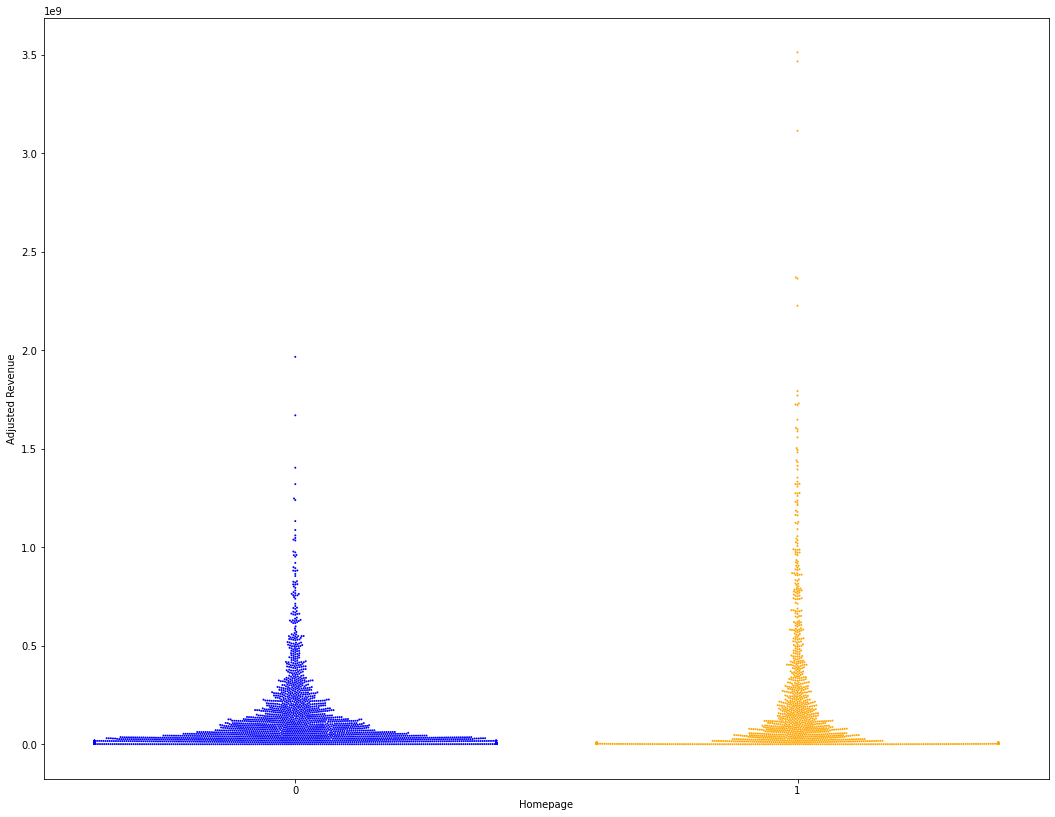

In [171]:
plt.figure(figsize=(18,14))

sns.swarmplot(data=f_train, x = 'homepage_exists', y = 'adjusted_revenue',
             palette=['blue', 'orange'],
             s=2)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Homepage', fontsize=10)
plt.ylabel('Adjusted Revenue', fontsize=10)

plt.show()

We see that films with a homepage tend to have higher adjusted revenue.

In [172]:
f_train.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Yaron Zilberman,Yorgos Lanthimos,Yoshihiro Nishimura,YÃ»dai Yamaguchi,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zillah Bowes,homepage_exists
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,0,0,0,0,0,0,0,0,0,1
7528,13067,tt0419843,0.569416,10000000,17500000,In the Land of Women,Meg Ryan|Kristen Stewart|Adam Brody|JoBeth Wil...,http://www.warnerbros.com/land-women,Jon Kasdan,Get ready to fall,...,0,0,0,0,0,0,0,0,0,1
9770,5121,tt0072226,0.415866,3000000,12800000,The Sugarland Express,Goldie Hawn|William Atherton|Ben Johnson|Louis...,NaN,Steven Spielberg,Every cop in the state was after her. Everybod...,...,0,0,0,0,0,0,0,0,0,0
3471,55465,tt1268799,1.024786,19000000,35387212,A Very Harold & Kumar Christmas,Neil Patrick Harris|John Cho|Elias Koteas|Dann...,http://haroldandkumar.warnerbros.com,Todd Strauss-Schulson,Christmas comes prematurely.,...,0,0,0,0,0,0,0,0,0,1
1533,22947,tt1193138,0.598075,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,...,0,0,0,0,0,0,0,0,0,1


### Release Date

We have seen that the year a film is released is correlated with adjusted_revenue. In this section we explore this further by breaking up the `year` column to include month, day of week, and quater.

In [173]:
f_train['release_date'].head()

3533   2011-04-01
7528   2007-04-16
9770   1974-04-05
3471   2011-11-04
1533   2009-09-05
Name: release_date, dtype: datetime64[ns]

In [174]:
def date(f_date):
    subset_dates = ['year', 'quarter', 'month', 'weekday']
    for subset in subset_dates:
        subset_col = 'release_date' + '' + subset
        f_train[subset_col] = getattr(f_train['release_date'].dt, subset).astype(int)
    return f_date

In [175]:
f_train = date(f_train)

In [176]:
f_train.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Zach Helm,Zack Snyder,Zal Batmanglij,Zalman King,Zillah Bowes,homepage_exists,release_dateyear,release_datequarter,release_datemonth,release_dateweekday
3533,44945,tt1529572,0.687144,9500000,120000,Trust,Clive Owen|Catherine Keener|Liana Liberato|Jas...,http://www.trustmovie2011.com/,David Schwimmer,"What took her family years to build, a strange...",...,0,0,0,0,0,1,2011,2,4,4
7528,13067,tt0419843,0.569416,10000000,17500000,In the Land of Women,Meg Ryan|Kristen Stewart|Adam Brody|JoBeth Wil...,http://www.warnerbros.com/land-women,Jon Kasdan,Get ready to fall,...,0,0,0,0,0,1,2007,2,4,0
9770,5121,tt0072226,0.415866,3000000,12800000,The Sugarland Express,Goldie Hawn|William Atherton|Ben Johnson|Louis...,NaN,Steven Spielberg,Every cop in the state was after her. Everybod...,...,0,0,0,0,0,0,1974,2,4,4
3471,55465,tt1268799,1.024786,19000000,35387212,A Very Harold & Kumar Christmas,Neil Patrick Harris|John Cho|Elias Koteas|Dann...,http://haroldandkumar.warnerbros.com,Todd Strauss-Schulson,Christmas comes prematurely.,...,0,0,0,0,0,1,2011,4,11,4
1533,22947,tt1193138,0.598075,25000000,163670000,Up in the Air,George Clooney|Vera Farmiga|Anna Kendrick|Jaso...,http://www.theupintheairmovie.com/,Jason Reitman,The story of a man ready to make a connection.,...,0,0,0,0,0,1,2009,3,9,5


In [178]:
f_train.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline',
       ...
       'Zach Helm', 'Zack Snyder', 'Zal Batmanglij', 'Zalman King',
       'Zillah Bowes', 'homepage_exists', 'release_dateyear',
       'release_datequarter', 'release_datemonth', 'release_dateweekday'],
      dtype='object', length=9290)

In [179]:
f_train['release_dateyear'].value_counts().sort_index()

1960      7
1961      7
1962      8
1963      4
1964      5
1965      5
1966      3
1967      9
1968     10
1969      3
1970     12
1971     14
1972      9
1973     15
1974     14
1975     12
1976     14
1977     19
1978     20
1979     23
1980     35
1981     32
1982     34
1983     43
1984     41
1985     54
1986     66
1987     56
1988     67
1989     61
1990     61
1991     54
1992     67
1993     87
1994     63
1995     81
1996     78
1997     94
1998     82
1999     95
2000     82
2001    100
2002    110
2003    113
2004    140
2005    145
2006    162
2007    151
2008    171
2009    167
2010    173
2011    189
2012    171
2013    196
2014    182
2015    163
Name: release_dateyear, dtype: int64

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


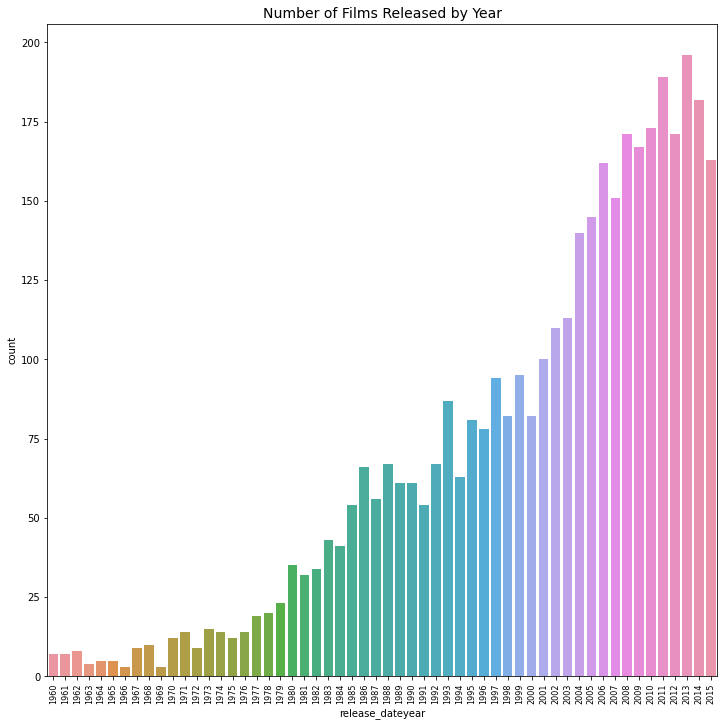

In [180]:
plt.figure(figsize=(12,12))

sns.countplot(f_train['release_dateyear'].sort_values())
plt.title('Number of Films Released by Year', fontsize=14)
plt.xticks(fontsize=8, rotation=90)

plt.show()

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.2% of the points c

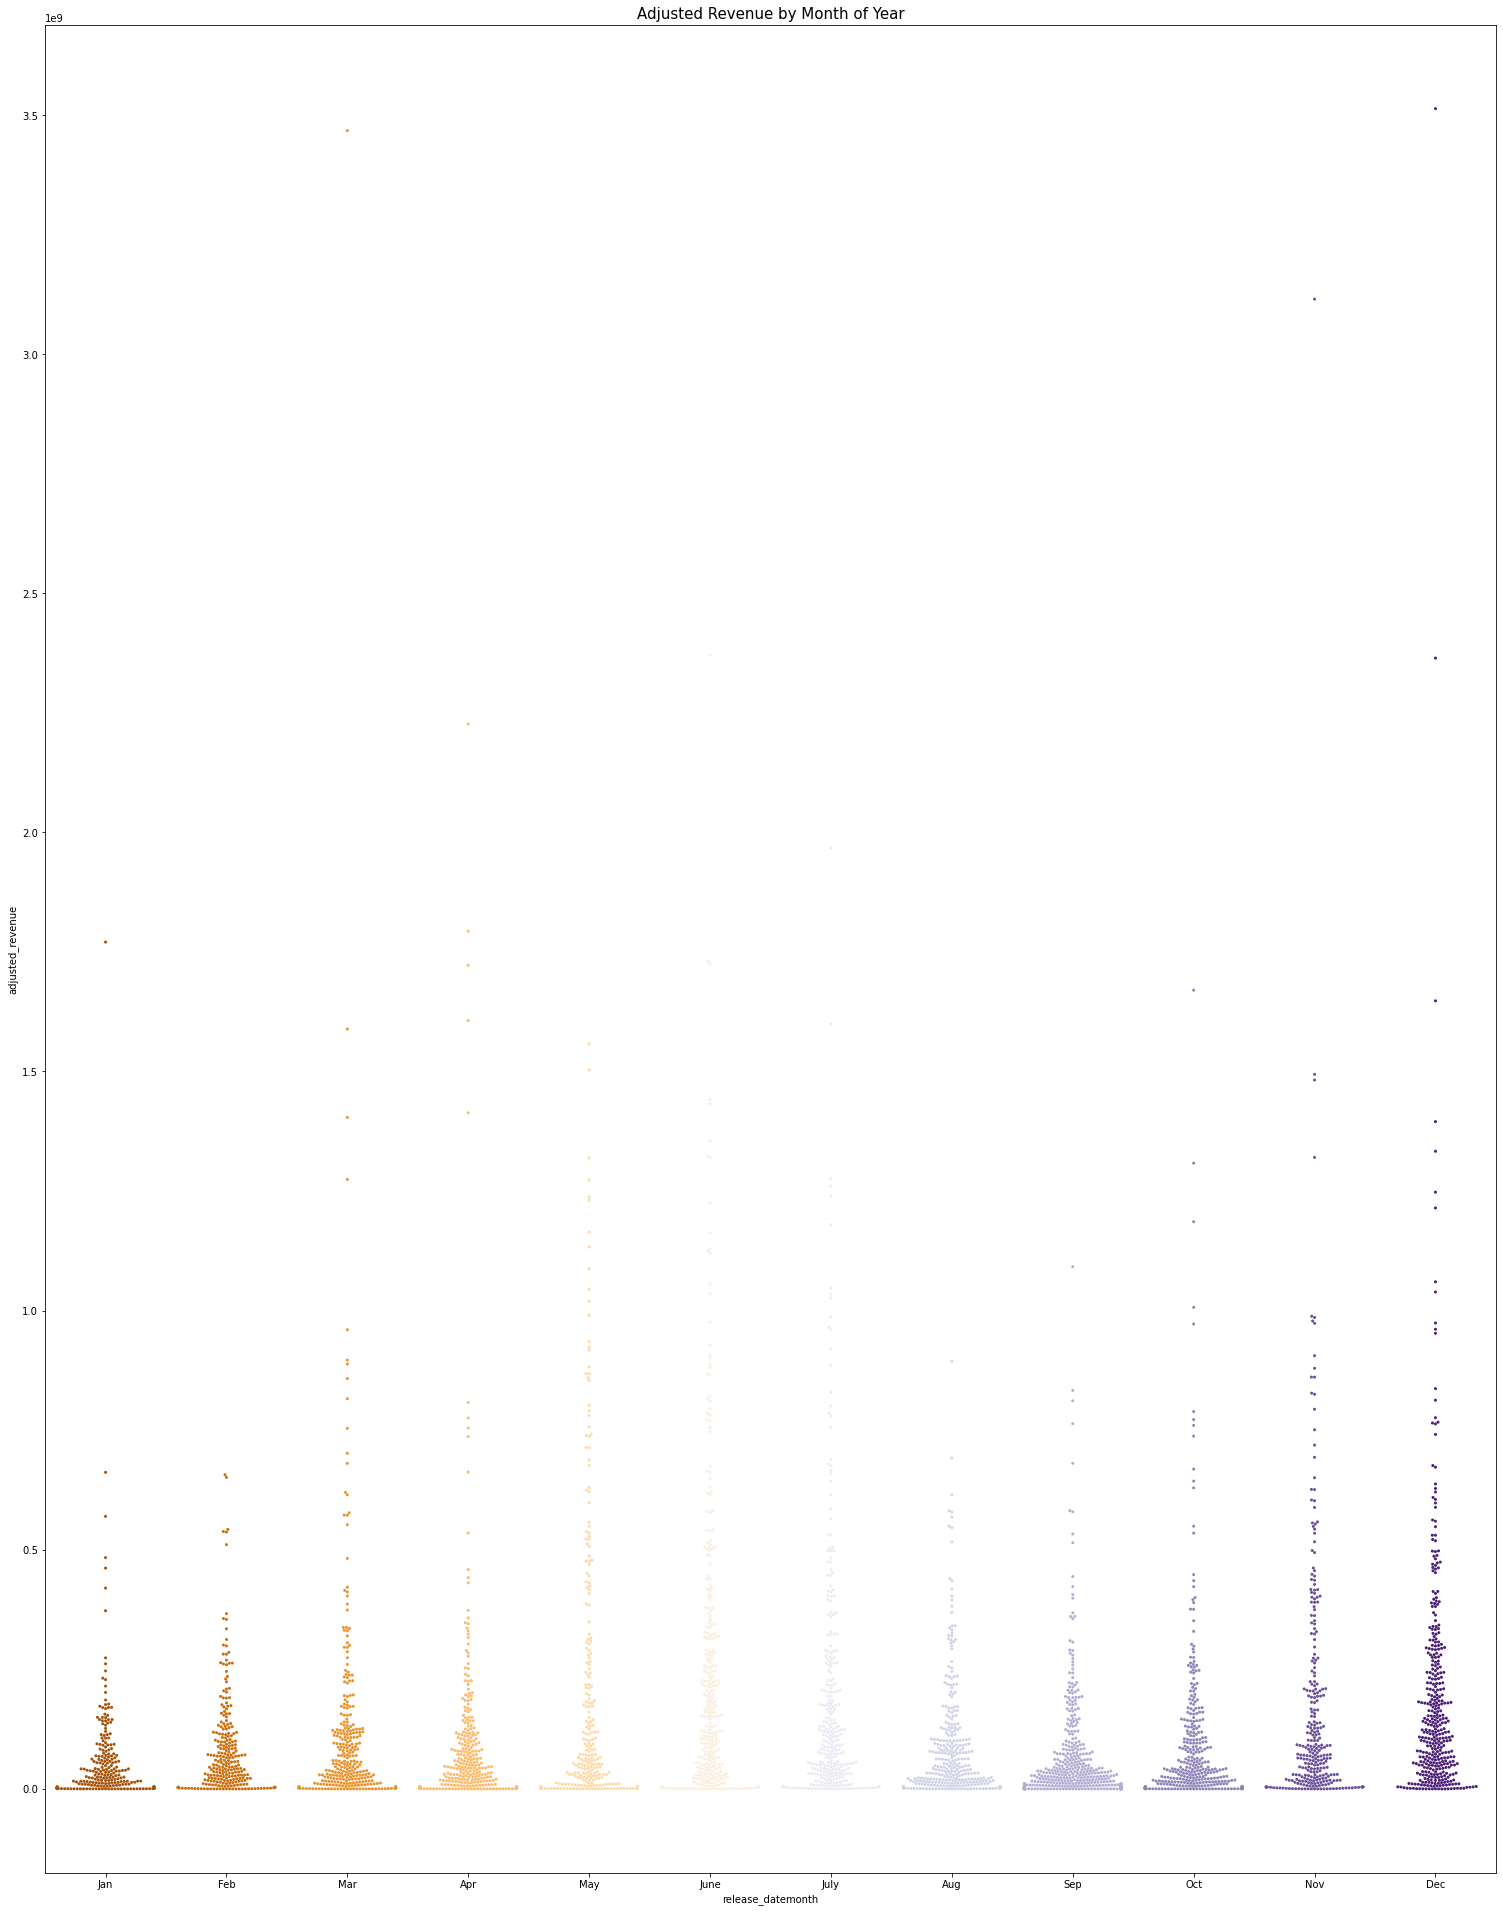

In [181]:
plt.figure(figsize=(26,34))

sns.swarmplot(data=f_train, x='release_datemonth', y='adjusted_revenue',
             palette='PuOr',
             s=3)
plt.title('Adjusted Revenue by Month of Year', fontsize=15)
loc, labels=plt.xticks()
loc, labels = loc, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(loc, labels)

plt.show()

Here we see that films that are released towards the end of the year tend to have higher adjusted revenues. We can further visualize this by plotting adjusted revenue againts year quarters, and then plotting day of the week.

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


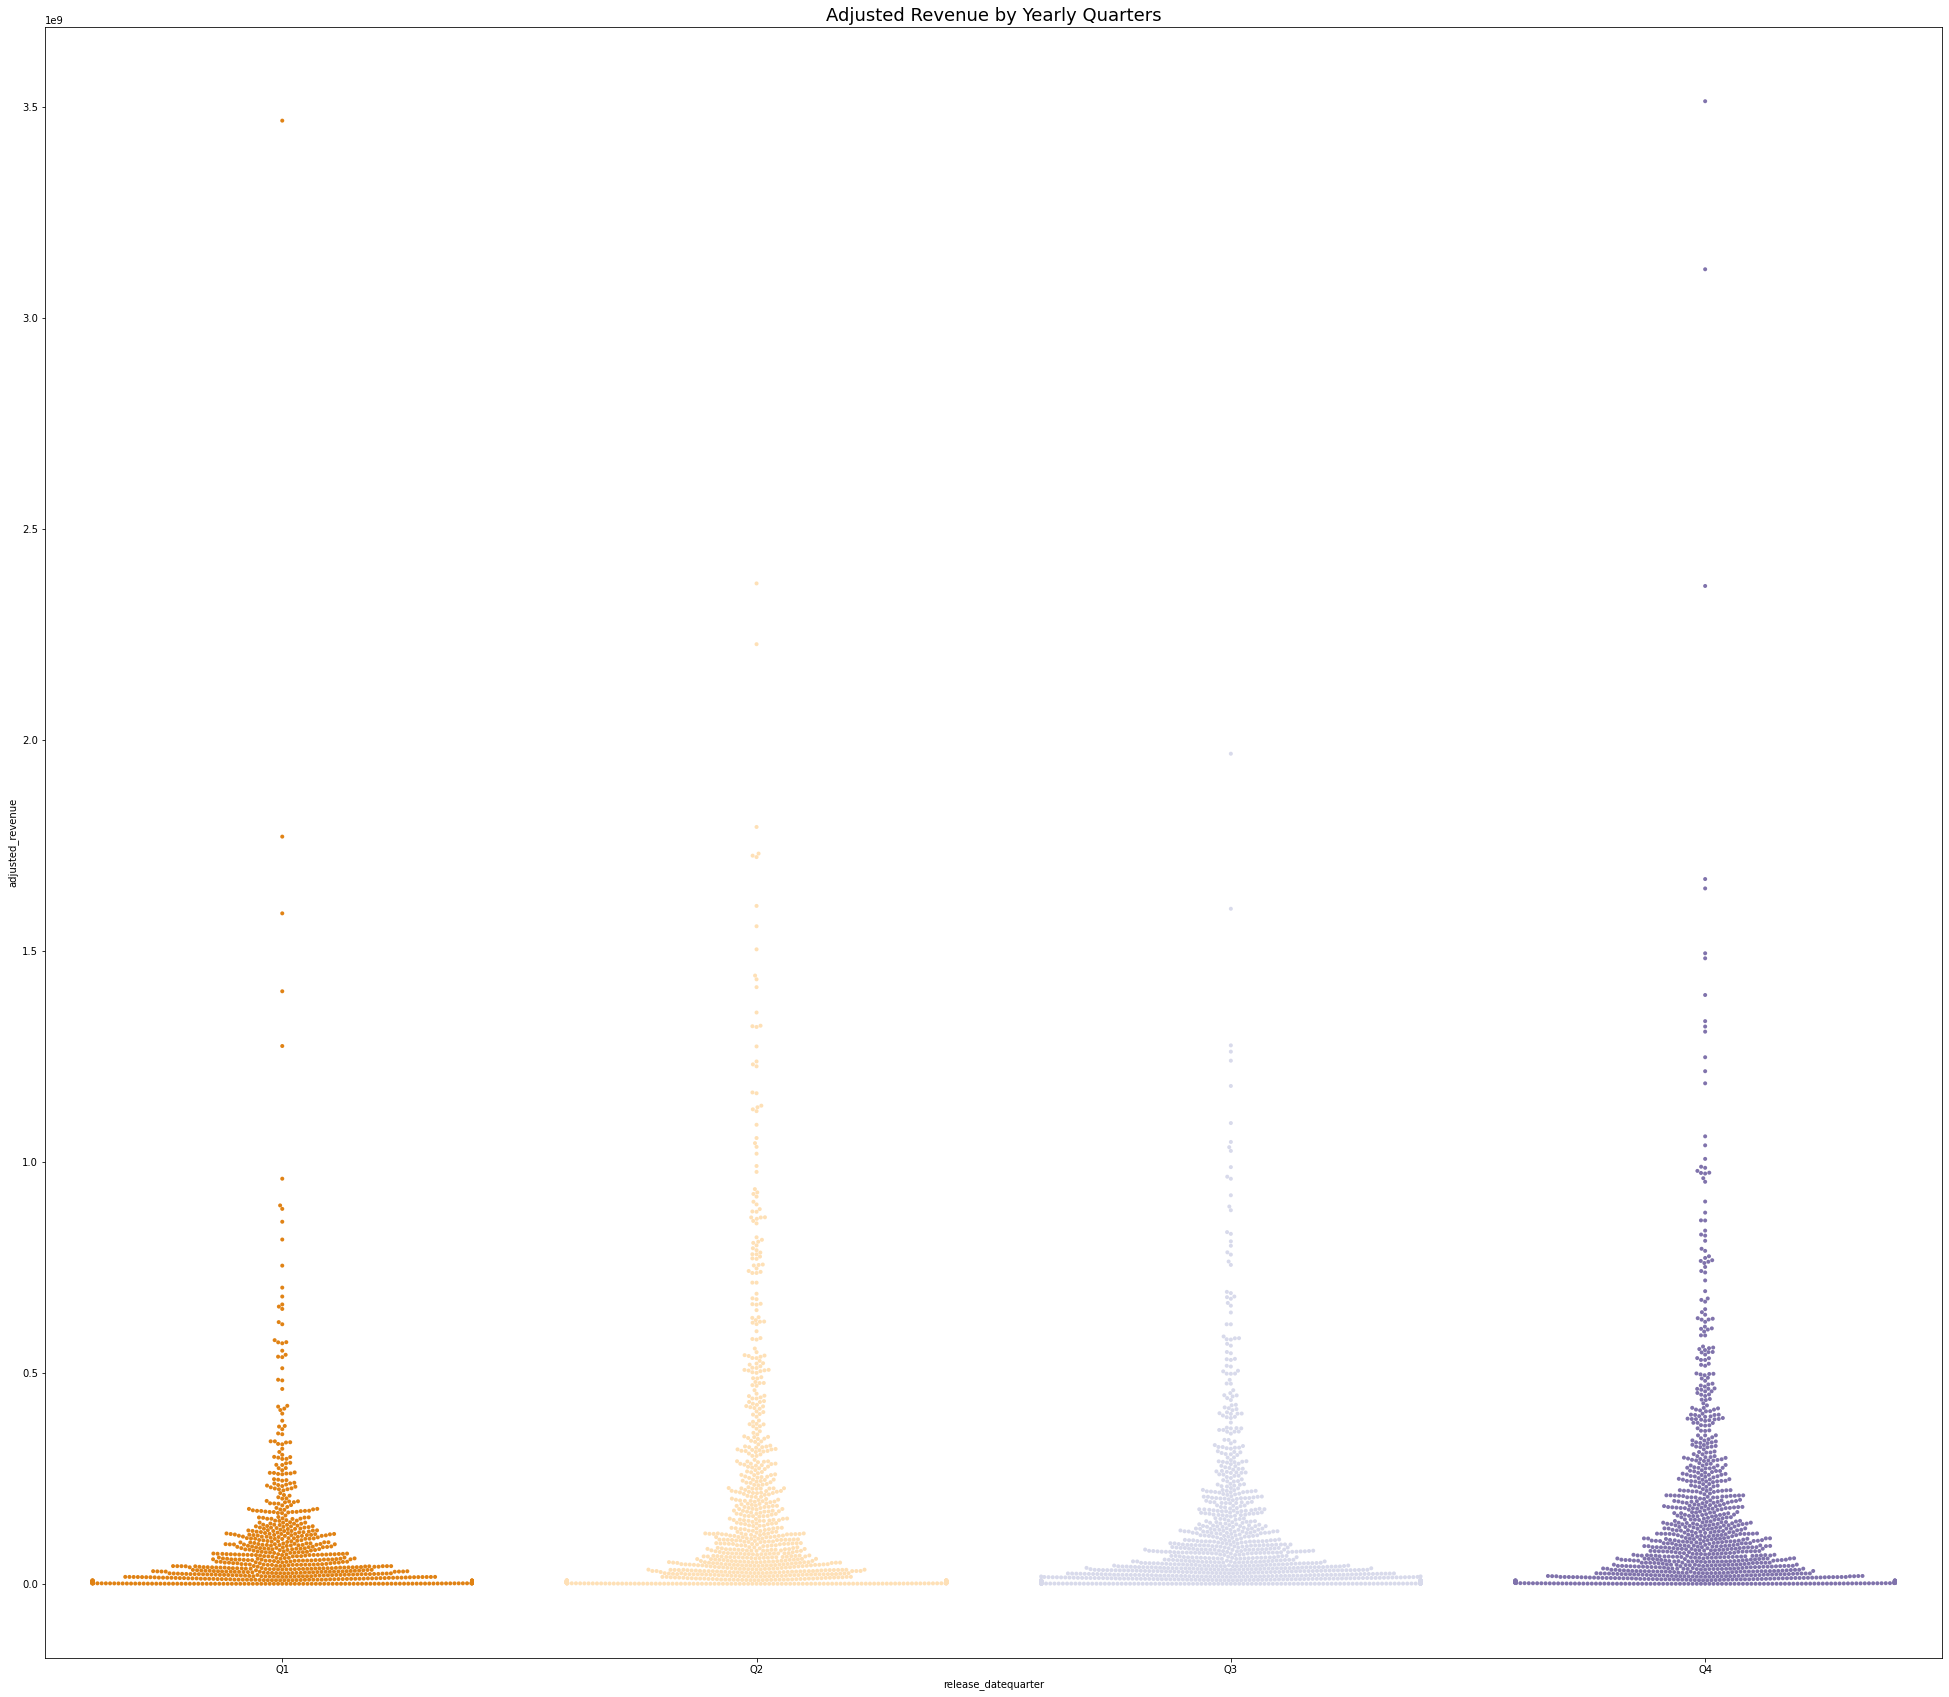

In [182]:
plt.figure(figsize=(34,30))

sns.swarmplot(data=f_train, x='release_datequarter', y='adjusted_revenue',
             palette='PuOr',
             s=4)
loc, labels=plt.xticks()
loc, labels = loc, ['Q1', 'Q2', 'Q3', 'Q4']
plt.xticks(loc, labels)
plt.title('Adjusted Revenue by Yearly Quarters', fontsize=18)

plt.show()

C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rbg32\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


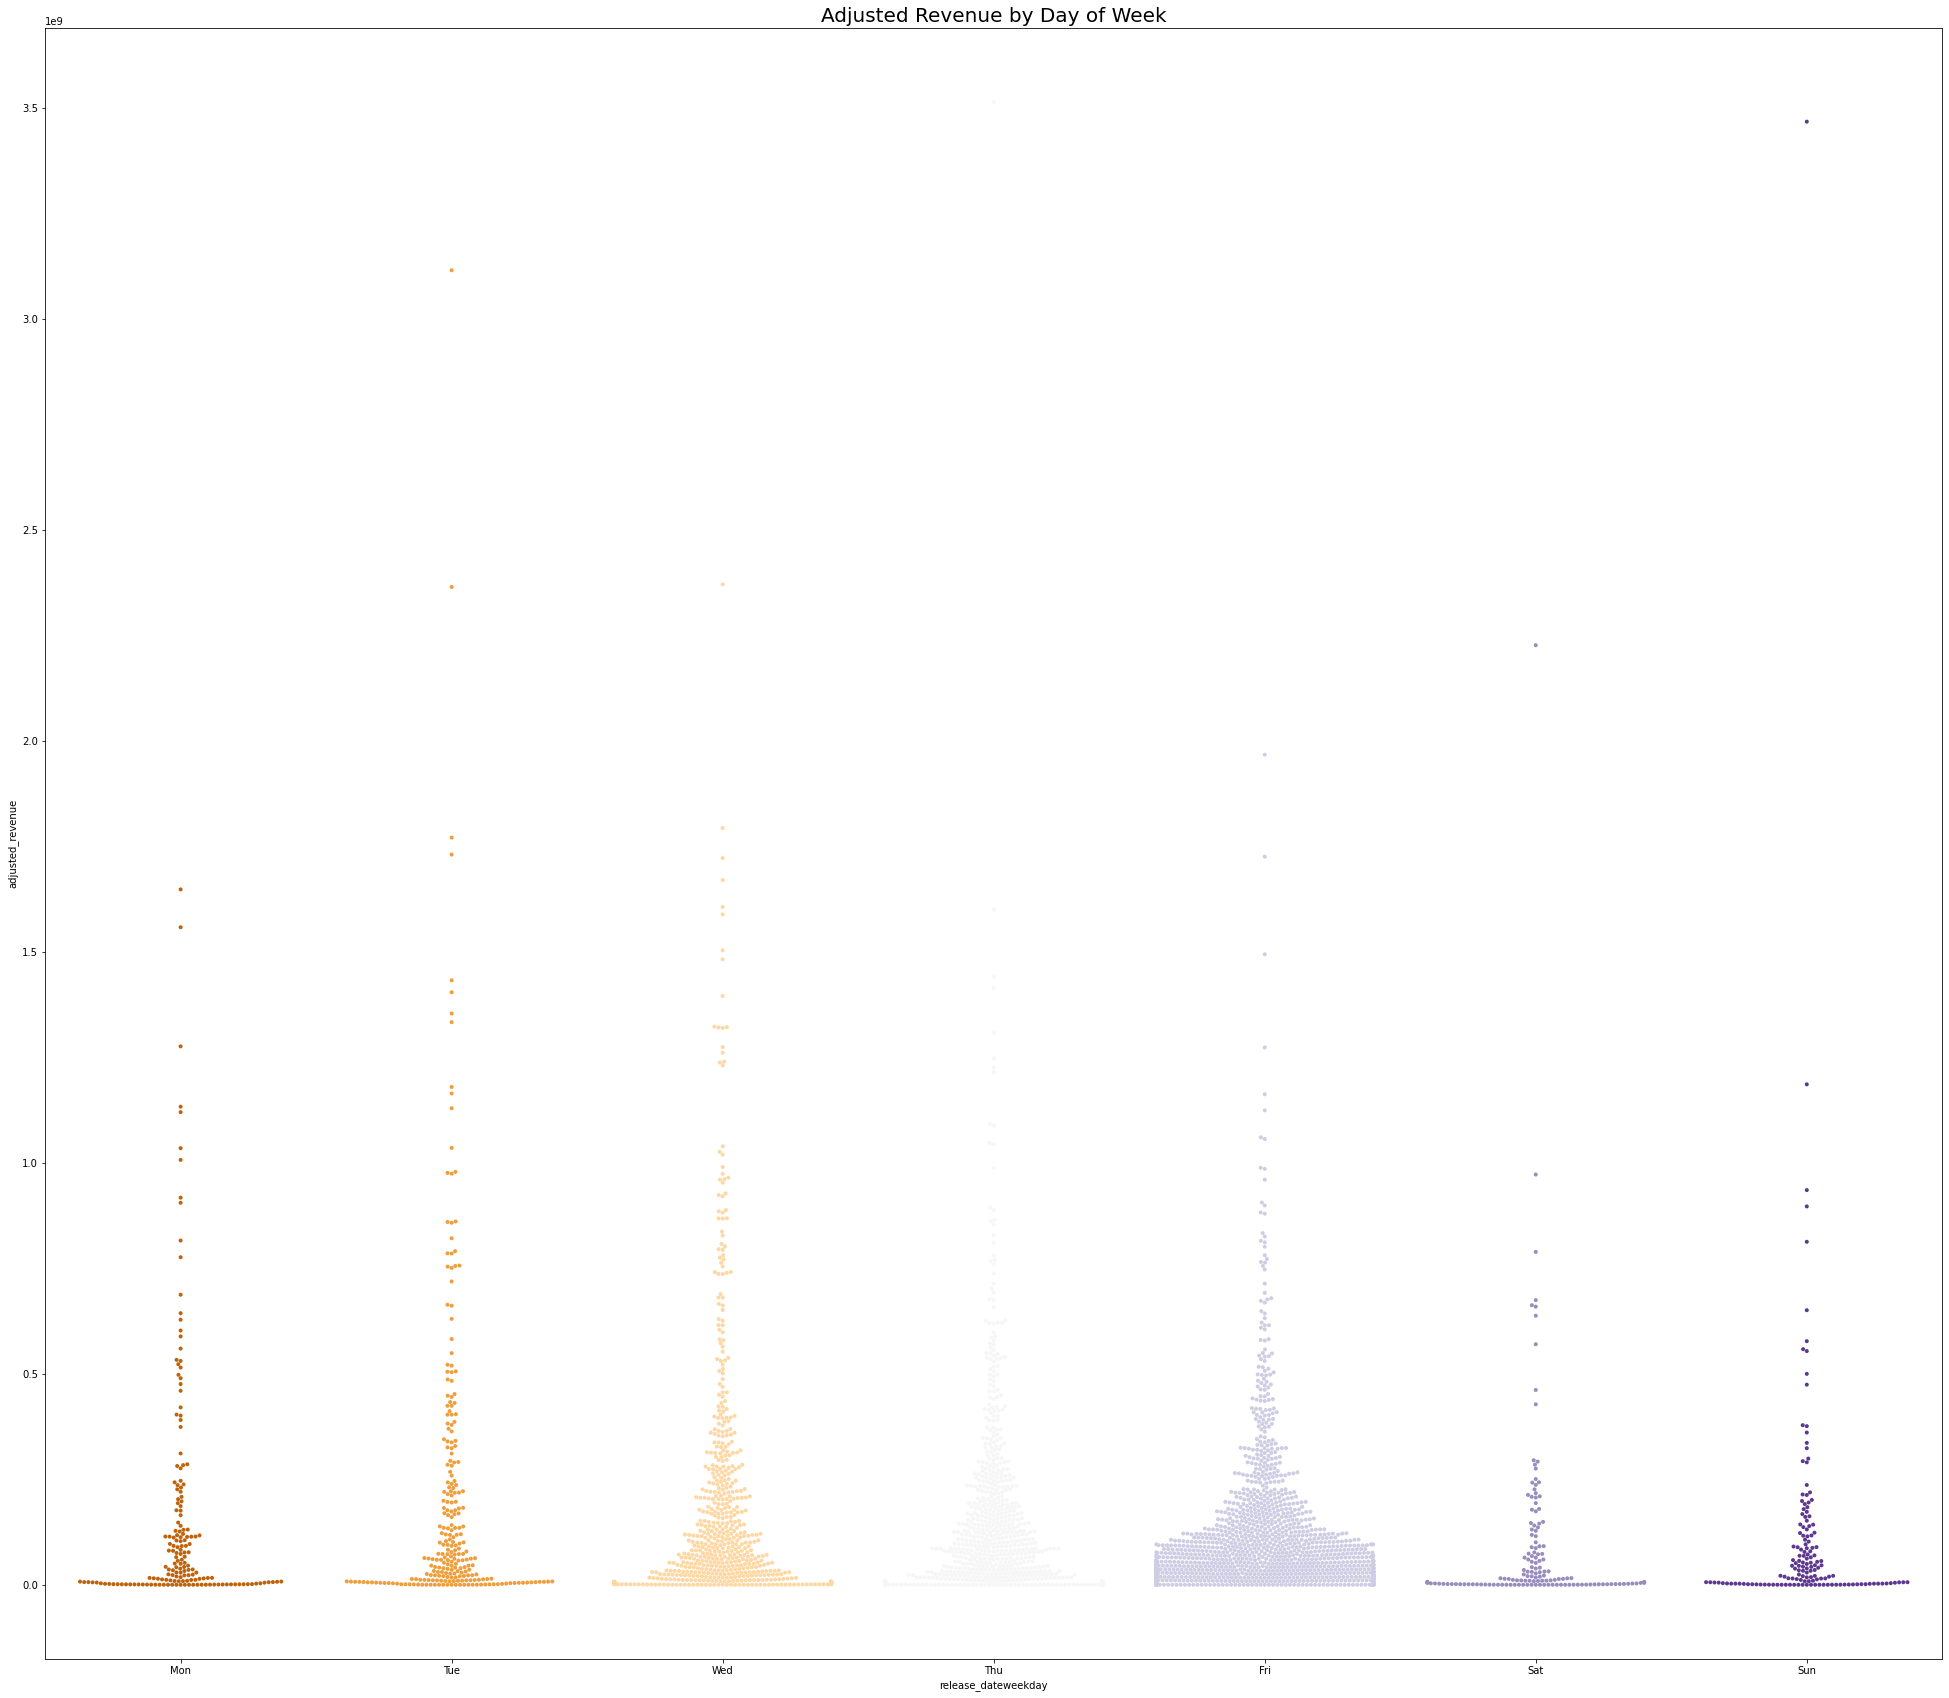

In [183]:
plt.figure(figsize=(34,30))

sns.swarmplot(data=f_train, x='release_dateweekday', y='adjusted_revenue',
             palette='PuOr',
             s=4)
loc, labels=plt.xticks()
loc, labels = loc, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(loc, labels)
plt.title('Adjusted Revenue by Day of Week', fontsize=20)

plt.show()

Finally, we consider the linear relations:

In [184]:
f_train[['adjusted_revenue', 'release_dateweekday', 'release_datemonth', 'homepage_exists',
        'release_datequarter']].corr()['adjusted_revenue'].sort_values()

release_dateweekday   -0.157334
release_datequarter    0.048701
release_datemonth      0.061758
homepage_exists        0.172001
adjusted_revenue       1.000000
Name: adjusted_revenue, dtype: float64

### Taglines

We first check for any relationship with the length of the tagline.

In [185]:
f_train['tagline']=f_train['tagline'].map(lambda x: str(x))
f_train['taglen']=f_train['tagline'].map(lambda x: len(x))
f_train[['tagline','taglen']]

,tagline,taglen
3533,"What took her family years to build, a strange...",68
7528,Get ready to fall,17
9770,Every cop in the state was after her. Everybod...,68
3471,Christmas comes prematurely.,28
1533,The story of a man ready to make a connection.,46
...,...,...
6728,They're the ultimate fighters. They've got the...,108
6556,Ahhh... it's got that new movie smell.,38
2430,Ever wanted to be someone else? Now you can.,44
8944,First His Wife. Now His Daughter. It's Time To...,62


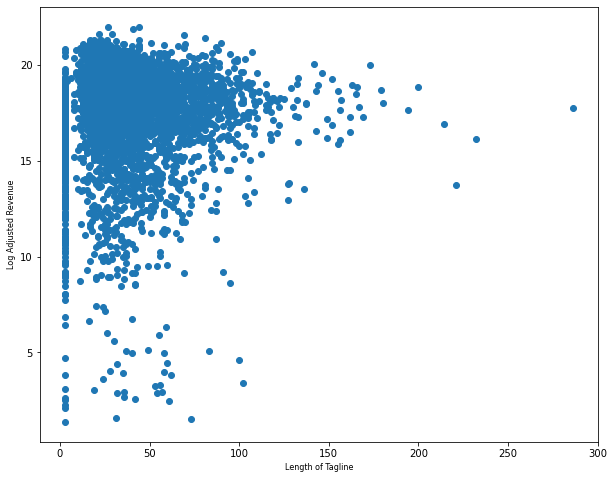

In [186]:
plt.figure(figsize=(10,8))

plt.scatter(f_train.taglen, f_train.log_adjrevenue)
plt.xlabel('Length of Tagline', fontsize=8)
plt.ylabel('Log Adjusted Revenue', fontsize=8)

plt.show()

Tagline length does not appear to be significant.

We now create a TF-IDF vector for the taglines.

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

t = TfidfVectorizer()
tfidf_vector = t.fit_transform(f_train.tagline).todense()

We find the 10 words with the highest total tfidf.

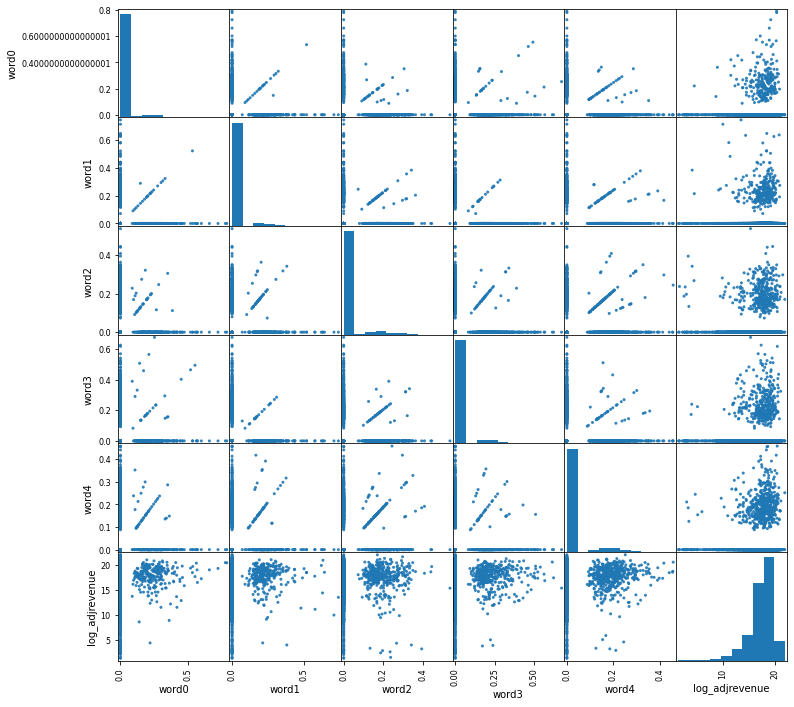

In [188]:
total_per_word = np.sum(tfidf_vector, axis=0)
index_top_ten = np.argpartition(total_per_word,-10)[0,-10:]

for i in range(0,10):
    f_train['word'+str(i)]=tfidf_vector[:,index_top_ten[0,i]]
    
scatter_matrix(f_train[['word0', 'word1', 'word2', 'word3',
                      'word4', 'log_adjrevenue']], figsize=(12,12), alpha=0.9)

plt.show()

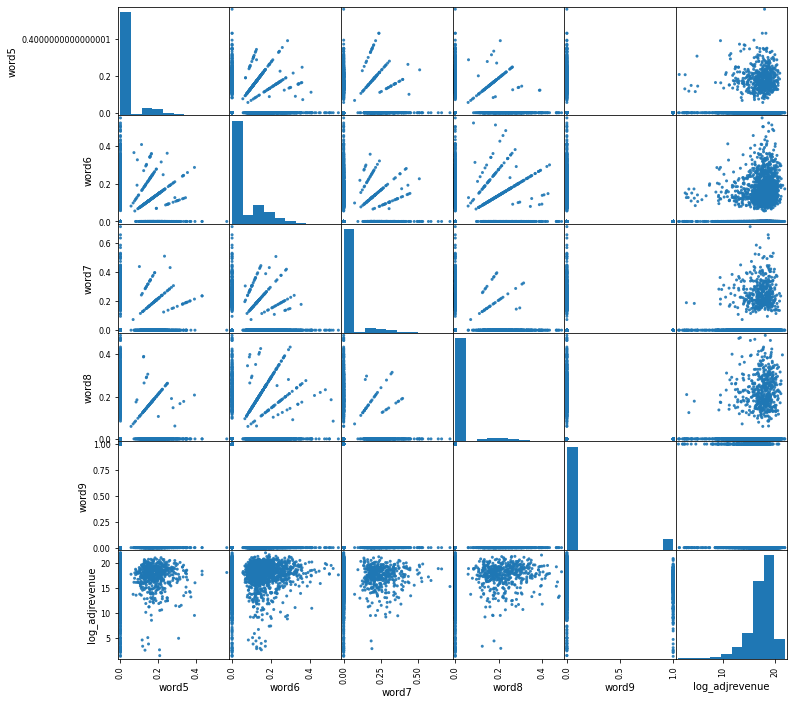

In [189]:
scatter_matrix(f_train[['word5', 'word6', 'word7', 'word8',
                      'word9', 'log_adjrevenue']], figsize=(12,12), alpha=0.9)

plt.show()

This direction does not seem promising, though there may be some correlation with word9.

We will test total and average tfidf as well.

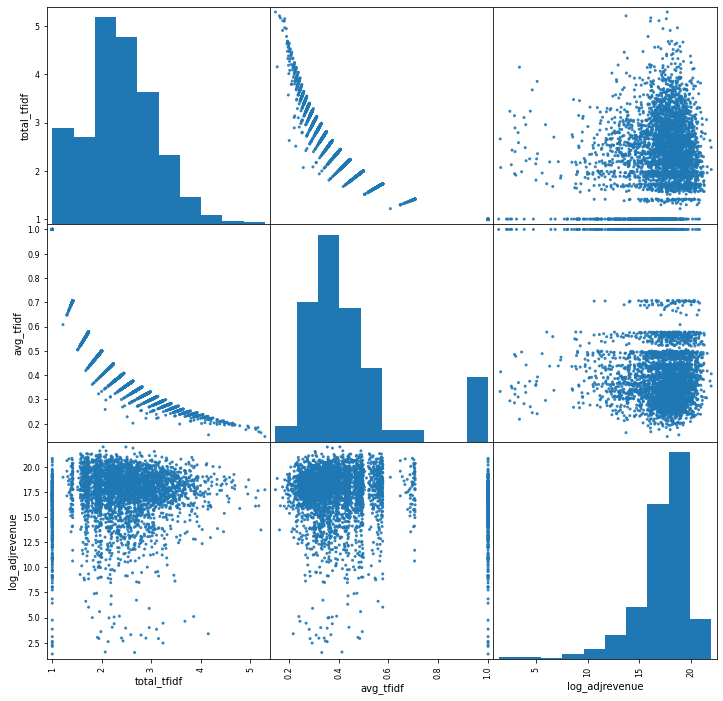

In [190]:
total_tfidf = np.sum(tfidf_vector, axis=1)
isnonzero_vector = 1*(tfidf_vector!=0)
avg_tfidf = total_tfidf / np.sum(isnonzero_vector, axis=1)

f_train['total_tfidf']=total_tfidf
f_train['avg_tfidf']=avg_tfidf

scatter_matrix(f_train[['total_tfidf','avg_tfidf','log_adjrevenue']], figsize=(12,12), alpha=0.9)

plt.show()

Once again, not very promising. We compute correlations:

In [191]:
f_train[['adjusted_revenue','taglen','word0', 'word1', 'word2', 'word3',
                      'word4','word5', 'word6', 'word7', 'word8',
                      'word9','total_tfidf','avg_tfidf']].corr()['adjusted_revenue'].sort_values()

word9              -0.138829
avg_tfidf          -0.080663
word7              -0.043609
word5              -0.032818
taglen             -0.014878
total_tfidf         0.001230
word1               0.003740
word3               0.014962
word2               0.017144
word0               0.026396
word4               0.030172
word8               0.033497
word6               0.071569
adjusted_revenue    1.000000
Name: adjusted_revenue, dtype: float64

In [192]:
f_train[['log_adjrevenue','taglen','word0', 'word1', 'word2', 'word3',
                      'word4','word5', 'word6', 'word7', 'word8',
                      'word9','total_tfidf','avg_tfidf']].corr()['log_adjrevenue'].sort_values()

word9            -0.242618
avg_tfidf        -0.197517
word5            -0.004183
word2            -0.000111
word7             0.003054
word1             0.015012
word3             0.033389
word8             0.042488
word4             0.045579
word0             0.048255
word6             0.086525
taglen            0.089298
total_tfidf       0.120240
log_adjrevenue    1.000000
Name: log_adjrevenue, dtype: float64

## Modeling

Here we begin by fitting baseline and linear models. As we previously noted, of the features which can be known (to some degree) before the movie's release, `adjusted_budget` is the feature with largest $|r|$ values, followed by `Adventure`, `runtime`, `Action`, and `Science Fiction` with positive $r$ values, and then `Drama`, `word9`, `year`, `Horror`, `avg_tfidf`, `Comedy`, and `Romance` with largest negative $r$ values. Finally we add top actors/actresses, and directors.



For the `log_adjrevenue` model we still have that `log_adjbudget` is the strongest predictor, followed by `runtime`, `Adventure`, `Action`, `total_tfidf`, `taglen`, `word6`, and `Science Fiction` with positive $r$ values. Then `word9`, `avg_tfidf`, `year`, `Drama`, `Horror`, and `Romance` with negative $r$ values. And finally, we also use the features `release_datemonth`, `release_datequarter`, and `release_dateweekday` as inputs.

Based on this information we can construct our most basic models:

0. Baseline:
$$\text{adjusted_revenue} = E(\text{adjusted_revenue})+ \epsilon$$

1. Baseline (log model):
$$\text{log_adjrevenue} = E(\text{log_adjrevenue})+ \epsilon$$

2. Linear Model:
$$\text{adjusted_revenue} = \beta_0 +\beta_1 \text{adjusted_budget} + \epsilon$$

3.  Linear Model (Log dependent var):
$$\text{log_adjrevenue} = \beta_0 +\beta_1 \text{log_adjbudget} + \epsilon$$


4.  Multiple Linear Model:
$$\text{adjusted_revenue} = \beta_0 + \beta_1 \text{adjusted_budget}+ \beta_2 \text{avg_tfidf}+ \beta_3 \text{total_tfidf}+ \beta_4 \text{Adventure}+\beta_5 \text{runtime}+ \beta_6 \text{taglen}+ \beta_7 \text{Action}+ \beta_8 \text{Science Fiction}+\beta_9 \text{year}+\beta_{10} \text{Drama}+\beta_{11} \text{Horror}+\beta_{12} \text{Comedy}+\beta_{13} \text{Romance} + \beta_{14}\text{Harrison Ford} + \beta_{15}\text{Tom Cruise}+ \beta_{16}\text{Cameron Diaz}+\beta_{17}\text{Robert Downey Jr.}+ \beta_{18}\text{Johnny Depp} +\beta_{19}\text{Steven Spielberg} +\beta_{20}\text{Tim Burton} +\beta_{21}\text{Ron Howard}+ \beta_{22}\text{Ridley Scott}+ \beta_{23}\text{Clint Eastwood}+ \beta_{24}\text{Martin Scorsese} + \beta_{25}\text{release_datemonth}+ \beta_{26}\text{release_datequarter}+ \beta_{27}\text{release_dateweekday}+ \beta_{28}\text{homepage_exists}+\sum_{i=0}^9\beta_{29+i}\text{word}i+\epsilon$$


5. Multiple Linear Model (Log dependent var):
$$\text{log_adjrevenue} = \beta_0 + \beta_1 \text{log_adjbudget}+ \beta_2 \text{avg_tfidf}+ \beta_3 \text{total_tfidf}+ \beta_4 \text{Adventure}+\beta_5 \text{runtime}+ \beta_6 \text{taglen}+ \beta_7 \text{Action}+ \beta_8 \text{Science Fiction}+\beta_9 \text{year}+\beta_{10} \text{Drama}+\beta_{11} \text{Horror}+\beta_{12} \text{Comedy}+\beta_{13} \text{Romance} + \beta_{14}\text{Harrison Ford} + \beta_{15}\text{Tom Cruise}+ \beta_{16}\text{Cameron Diaz}+\beta_{17}\text{Robert Downey Jr.}+ \beta_{18}\text{Johnny Depp} +\beta_{19}\text{Steven Spielberg} +\beta_{20}\text{Tim Burton} +\beta_{21}\text{Ron Howard}+ \beta_{22}\text{Ridley Scott}+ \beta_{23}\text{Clint Eastwood}+ \beta_{24}\text{Martin Scorsese} + \beta_{25}\text{release_datemonth}+ \beta_{26}\text{release_datequarter}+ \beta_{27}\text{release_dateweekday} + \beta_{28}\text{homepage_exists}+\sum_{i=0}^9\beta_{29+i}\text{word}i+\epsilon$$

### k-Fold Cross-Validation

We now implement cross-validation to test our models.

In [195]:
kfold = KFold(n_splits = 5,
             shuffle = True,
             random_state= 440)

In [196]:
print(f_train.adjusted_revenue.values.shape)

(1, 3879)


In [197]:
inputs = ['baseline',
         ['adjusted_budget'],
         ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']]

cv_mses = np.zeros((5, len(inputs)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'baseline':
            pred = f_tt.adjusted_revenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses[i,j] = mean_squared_error(f_ho.adjusted_revenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs)):
    if inputs[i] == 'baseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses[:,i]),2))
    else:
        print('The avg cv mse for the model using: ', inputs[i], 'as the input is: ',
             np.round(np.mean(cv_mses[:,i]),2))


The avg cv mse for the baseline model is:  6.3662801289109864e+16
The avg cv mse for the model using:  ['adjusted_budget'] as the input is:  4.105952446958906e+16
The avg cv mse for the model using:  ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime', 'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance', 'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg', 'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth', 'release_datequarter', 'release_dateweekday', 'homepage_exists', 'word0', 'word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9'] as the input is:  3.745805571684656e+16


In [198]:
inputs2 = ['logbaseline',
         ['log_adjbudget'],
         ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']]

cv_mses2 = np.zeros((5, len(inputs2)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs2:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'logbaseline':
            pred = f_tt.log_adjrevenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses2[i,j] = mean_squared_error(f_ho.log_adjrevenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs2)):
    if inputs2[i] == 'logbaseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses2[:,i]),2))
    else:
        print('The avg cv mse for the model using: ', inputs2[i], 'as the input is: ',
             np.round(np.mean(cv_mses2[:,i]),2))

The avg cv mse for the baseline model is:  7.18
The avg cv mse for the model using:  ['log_adjbudget'] as the input is:  5.76
The avg cv mse for the model using:  ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime', 'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance', 'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg', 'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth', 'release_datequarter', 'release_dateweekday', 'homepage_exists', 'word0', 'word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9'] as the input is:  4.88


We see that, as written, the model with `adjusted_revenue` and all other included features has the lowest MSE.

We can further include all genres (not just the top 5 or 8) to our model and see if it performs better.

In [199]:
inputs3 = ['baseline',
         ['adjusted_budget'],
         ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Animation', 'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 
          'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']]

cv_mses3 = np.zeros((5, len(inputs3)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs3:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'baseline':
            pred = f_tt.adjusted_revenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses3[i,j] = mean_squared_error(f_ho.adjusted_revenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs3)):
    if inputs3[i] == 'baseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses3[:,i]),2))
    else:
        print('The avg cv mse for the model using: ', inputs3[i], 'as the input is: ',
             np.round(np.mean(cv_mses3[:,i]),2))


The avg cv mse for the baseline model is:  6.3662801289109864e+16
The avg cv mse for the model using:  ['adjusted_budget'] as the input is:  4.105952446958906e+16
The avg cv mse for the model using:  ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime', 'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance', 'Animation', 'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg', 'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth', 'release_datequarter', 'release_dateweekday', 'homepage_exists', 'word0', 'word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9'] as the input is:  3.697257100142626e+16


Here we see that adding all genres to our model performs only slightly better than our previous multiple regression model.

We can further define other non-linear transformations on the features, for example plotting `log_adjrevenue` against `runtime` we see some logarithmic relation.

So we can construct yet another model:

6. Multiple Regression (log)

$$\text{log_adjrevenue} = \beta_0 + \beta_1 \text{log_adjbudget}+ \beta_2 \text{avg_tfidf}+ \beta_3 \text{total_tfidf}+ \beta_4 \text{Adventure}+\beta_5 \text{log_runtime}+ \beta_6 \text{taglen}+ \beta_7 \text{Action}+ \beta_8 \text{Science Fiction}+\beta_9 \text{year}+\beta_{10} \text{Drama}+\beta_{11} \text{Horror}+\beta_{12} \text{Comedy}+\beta_{13} \text{Romance} \beta_{14} \text{Animation}+ \beta_{15} \text{Crime}+ \beta_{16}\text{Documentary}+ \beta_{17}\text{Family}+\beta_{18}\text{Fantasy}+\beta_{19}\text{Foreign}+ \beta_{20}\text{History} +\beta_{21}\text{Music} + \beta_{22}\text{Mystery}+ \beta_{23}\text{TV Movie}+ \beta_{25}\text{War} + \beta_{26}\text{Western} + \beta_{27}\text{Harrison Ford} + \beta_{28}\text{Tom Cruise}+ \beta_{29}\text{Cameron Diaz}+\beta_{30}\text{Robert Downey Jr.}+ \beta_{31}\text{Johnny Depp} +\beta_{32}\text{Steven Spielberg} +\beta_{33}\text{Tim Burton} +\beta_{34}\text{Ron Howard}+ \beta_{35}\text{Ridley Scott}+ \beta_{36}\text{Clint Eastwood}+ \beta_{37}\text{Martin Scorsese} + \beta_{38}\text{release_datemonth}+ \beta_{39}\text{release_datequarter}+ \beta_{40}\text{release_dateweekday}+ \beta_{41}\text{homepage_exists}+\sum_{i=0}^9\beta_{42+i}\text{word}i  +\epsilon$$

In [274]:
f_train['log_runtime'] = 10*(np.log1p(f_train['runtime']))
f_test['log_runtime'] = 10*(np.log1p(f_test['runtime']))

In [234]:
inputs5 = ['logbaseline',
         ['log_adjbudget'],
         ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'log_runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Animation',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 
          'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']]

cv_mses5 = np.zeros((5, len(inputs5)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs5:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'logbaseline':
            pred = f_tt.log_adjrevenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses5[i,j] = mean_squared_error(f_ho.log_adjrevenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs5)):
    if inputs5[i] == 'logbaseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses5[:,i]),4))
    else:
        print('The avg cv mse for the model using: ', inputs5[i], 'as the input is: ',
             np.round(np.mean(cv_mses5[:,i]),2))

The avg cv mse for the baseline model is:  7.1807
The avg cv mse for the model using:  ['log_adjbudget'] as the input is:  5.76
The avg cv mse for the model using:  ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'log_runtime', 'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance', 'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Animation', 'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg', 'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth', 'release_datequarter', 'release_dateweekday', 'homepage_exists', 'word0', 'word1', 'word2', 'word3', 'word4', 'word5', 'word6', 'word7', 'word8', 'word9'] as the input is:  4.69


Note that this is a slight improvement over previous models. Finally, we can add more actors/actresses and directors to our models.

7. Mutiple Regression (Top 50 Actors and all genres)

$$\text{adjusted_revenue} = \beta_0 + \beta_1 \text{adjusted_budget}+ \beta_2 \text{avg_tfidf}+ \beta_3 \text{total_tfidf}+ \beta_4 \text{Adventure}+\beta_5 \text{runtime}+ \beta_6 \text{taglen}+ \beta_7 \text{Action}+ \beta_8 \text{Science Fiction}+\beta_9 \text{year}+\beta_{10} \text{Drama}+\beta_{11} \text{Horror}+\beta_{12} \text{Comedy}+\beta_{13} \text{Romance}+ \beta_{14} \text{Animation}+ \beta_{15} \text{Crime}+ \beta_{16}\text{Documentary}+ \beta_{17}\text{Family}+\beta_{18}\text{Fantasy}+\beta_{19}\text{Foreign}+ \beta_{20}\text{History} +\beta_{21}\text{Music} + \beta_{22}\text{Mystery}+ \beta_{23}\text{TV Movie}+ \beta_{24}\text{War} + \beta_{25}\text{Western} + \sum_{j=0}^{49}\beta_{26+j}\text{Act_j} +\beta_{77}\text{Steven Spielberg} +\beta_{78}\text{Tim Burton} +\beta_{79}\text{Ron Howard}+ \beta_{80}\text{Ridley Scott}+ \beta_{81}\text{Clint Eastwood}+ \beta_{82}\text{Martin Scorsese} + \beta_{81}\text{release_datemonth}+ \beta_{82}\text{release_datequarter}+ \beta_{83}\text{release_dateweekday}+ \beta_{84}\text{homepage_exists}+\sum_{i=0}^{9}\beta_{85+i}\text{word}i \epsilon$$


In [202]:
inputs6 = ['baseline',
         ['adjusted_budget'],
         ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Animation', 'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Steven Spielberg', 'Tim Burton',
          'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 
         'Robert De Niro', 'Bruce Willis', 'Samuel L. Jackson', 'Nicolas Cage',
         'Morgan Freeman', 'Robin Williams', 'Johnny Depp', 'Sylvester Stallone',
         'Matt Damon', 'Tom Hanks', 'Julianne Moore', 'Brad Pitt', 'Harrison Ford',
         'Dennis Quaid', 'Liam Neeson', 'Tom Cruise', 'Denzel Washington',
         'Eddie Murphy', 'Willem Dafoe', 'Gene Hackman', 'Meryl Streep',
         'Nicole Kidman', 'Ben Affleck', 'John Goodman', 'Ewan McGregor',
         'Clint Eastwood', 'Owen Wilson', 'Mark Wahlberg', 'Cameron Diaz',
         'Dustin Hoffman', 'Colin Farrell', 'Ethan Hawke', 'John Travolta',
         'Michael Douglas', 'Woody Harrelson', 'John Cusack', 'Arnold Schwarzenegger',
         'Antonio Banderas', 'Susan Sarandon', 'Adam Sandler', 'Robert Downey Jr.',
         'Keanu Reeves', 'Kevin Costner', 'James Franco', 'Christopher Walken',
         'Ben Stiller', 'Jim Carrey', 'Julia Roberts', 'Al Pacino', 'Robert Duvall', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']]

cv_mses6 = np.zeros((5, len(inputs6)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs6:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'baseline':
            pred = f_tt.adjusted_revenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses6[i,j] = mean_squared_error(f_ho.adjusted_revenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs6)):
    if inputs6[i] == 'baseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses6[:,i]),2))
    else:
        print('The avg cv mse for the model using: ', inputs6[i], 'as the input is: ',
             np.round(np.mean(cv_mses6[:,i]),2))


The avg cv mse for the baseline model is:  6.3662801289109864e+16
The avg cv mse for the model using:  ['adjusted_budget'] as the input is:  4.105952446958906e+16
The avg cv mse for the model using:  ['adjusted_budget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'runtime', 'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance', 'Animation', 'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Western', 'Documentary', 'Family', 'Fantasy', 'Steven Spielberg', 'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'Robert De Niro', 'Bruce Willis', 'Samuel L. Jackson', 'Nicolas Cage', 'Morgan Freeman', 'Robin Williams', 'Johnny Depp', 'Sylvester Stallone', 'Matt Damon', 'Tom Hanks', 'Julianne Moore', 'Brad Pitt', 'Harrison Ford', 'Dennis Quaid', 'Liam Neeson', 'Tom Cruise', 'Denzel Washington', 'Eddie Murphy', 'Willem Dafoe', 'Gene Hackman', 'Meryl Streep', 'Nicole Kidman', 'Ben Affleck', 'John Goodman', 'Ewan McGrego

We then conclude that our best performing models are Models 5 and 6.

## Feature Selection


The models considered above contain many features. We investigate whether we can use the Lasso algorithm to select a smaller set of features for a model with similar performance.

In [213]:
alphas = [0.000001,.00001,.0001,.001,.01,.1,1,10,100,1000,10000, 100000, 1000000, 10000000,100000000,1000000000,10000000000]
features = ['taglen', 'runtime', 'avg_tfidf', 'total_tfidf', 'year', 'adjusted_budget',
            'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
            'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 
            'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Harrison Ford',
            'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']

## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
f_train_array = f_train[features].to_numpy()

scaler = StandardScaler()
f_train_array_scaled = f_train_array.copy()
f_train_array_scaled[:,:] = scaler.fit_transform(f_train_array_scaled[:,:])


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=100000000)
    
    
    ## fit model
    lasso.fit(f_train_array_scaled, f_train.adjusted_revenue.values.transpose())
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

## use dataframe to look at coefs

pd.DataFrame(np.round(coefs, 2), index=alphas, columns=features)

,taglen,runtime,avg_tfidf,total_tfidf,year,adjusted_budget,Action,Adventure,Animation,Comedy,...,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
1.000000e-06,1736584.61,30941806.39,-33927875.48,-38904181.31,-46984708.66,1.228692e+08,-6093078.34,15786542.65,11327615.47,-2073696.62,...,-1188712.13,-718131.21,2203306.59,2951548.96,3413060.44,-1509015.13,3611843.92,-2241778.06,2244214.65,1424915.24
1.000000e-05,1736584.61,30941806.39,-33927875.47,-38904181.31,-46984708.66,1.228692e+08,-6093078.34,15786542.65,11327615.47,-2073696.62,...,-1188712.13,-718131.21,2203306.59,2951548.96,3413060.44,-1509015.13,3611843.92,-2241778.06,2244214.65,1424915.24
1.000000e-04,1736584.61,30941806.39,-33927875.47,-38904181.30,-46984708.66,1.228692e+08,-6093078.34,15786542.65,11327615.47,-2073696.62,...,-1188712.13,-718131.21,2203306.59,2951548.96,3413060.44,-1509015.13,3611843.92,-2241778.06,2244214.65,1424915.23
1.000000e-03,1736584.60,30941806.39,-33927875.42,-38904181.26,-46984708.66,1.228692e+08,-6093078.34,15786542.65,11327615.47,-2073696.62,...,-1188712.13,-718131.21,2203306.59,2951548.96,3413060.44,-1509015.13,3611843.93,-2241778.06,2244214.65,1424915.21
1.000000e-02,1736584.43,30941806.38,-33927874.92,-38904180.82,-46984708.65,1.228692e+08,-6093078.34,15786542.65,11327615.47,-2073696.59,...,-1188712.12,-718131.20,2203306.58,2951548.95,3413060.43,-1509015.12,3611843.94,-2241778.06,2244214.65,1424914.94
1.000000e-01,1736582.75,30941806.32,-33927869.94,-38904176.42,-46984708.60,1.228692e+08,-6093078.26,15786542.59,11327615.45,-2073696.35,...,-1188712.02,-718131.14,2203306.50,2951548.85,3413060.37,-1509015.08,3611844.05,-2241778.03,2244214.62,1424912.30
1.000000e+00,1736566.04,30941805.68,-33927820.02,-38904132.36,-46984708.09,1.228692e+08,-6093077.52,15786542.02,11327615.31,-2073693.97,...,-1188711.01,-718130.51,2203305.70,2951547.85,3413059.75,-1509014.60,3611845.22,-2241777.74,2244214.41,1424885.82
1.000000e+01,1736399.16,30941799.33,-33927319.24,-38903691.30,-46984702.94,1.228692e+08,-6093070.12,15786536.32,11327613.83,-2073670.09,...,-1188700.92,-718124.23,2203297.72,2951537.84,3413053.63,-1509009.78,3611856.90,-2241774.82,2244212.32,1424620.01
1.000000e+02,1734730.05,30941735.54,-33922306.24,-38899277.95,-46984651.51,1.228691e+08,-6092995.99,15786479.40,11327598.94,-2073431.33,...,-1188600.00,-718061.43,2203217.98,2951437.85,3412992.53,-1508961.57,3611973.88,-2241745.49,2244191.44,1421959.01
1.000000e+03,1718026.07,30941095.93,-33872186.38,-38855135.48,-46984137.24,1.228681e+08,-6092253.76,15785910.31,11327449.26,-2071044.08,...,-1187590.63,-717433.85,2202419.96,2950437.91,3412381.26,-1508480.29,3613143.27,-2241453.01,2243982.26,1395356.94


Many features disappear between $\alpha=10^7$ and $\alpha=10^8$. We run Lasso again with a finer range of values of $\alpha$.

In [224]:
alphas = 10000000*np.array([1,2,3,4,5,6,7,8,9,10])
features = ['taglen', 'runtime', 'avg_tfidf', 'total_tfidf', 'year', 'adjusted_budget',
            'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 
            'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 
            'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'Harrison Ford',
            'Tom Cruise', 'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']

## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
f_train_array = f_train[features].to_numpy()

scaler = StandardScaler()
f_train_array_scaled = f_train_array.copy()
f_train_array_scaled[:,:] = scaler.fit_transform(f_train_array_scaled[:,:])


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=100000000)
    
    
    ## fit model
    lasso.fit(f_train_array_scaled, f_train.adjusted_revenue.values.transpose())
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

## use dataframe to look at coefs

pd.DataFrame(np.round(coefs, 2), index=alphas, columns=features)

,taglen,runtime,avg_tfidf,total_tfidf,year,adjusted_budget,Action,Adventure,Animation,Comedy,...,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
10000000,-0.0,15055526.38,-0.0,-0.0,-29811640.68,1.260216e+08,-0.0,10665505.60,3984642.1,0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-71029.86
20000000,-0.0,5112592.26,-0.0,-0.0,-15102241.25,1.249093e+08,0.0,7102296.42,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
30000000,-0.0,0.00,-0.0,-0.0,-1764121.00,1.197538e+08,0.0,1503347.89,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
40000000,-0.0,0.00,-0.0,0.0,-0.00,1.104178e+08,0.0,0.00,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
50000000,-0.0,0.00,-0.0,0.0,-0.00,1.004178e+08,0.0,0.00,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
60000000,-0.0,0.00,-0.0,0.0,-0.00,9.041778e+07,0.0,0.00,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
70000000,-0.0,0.00,-0.0,0.0,-0.00,8.041778e+07,0.0,0.00,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
80000000,-0.0,0.00,-0.0,0.0,-0.00,7.041778e+07,0.0,0.00,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
90000000,-0.0,0.00,-0.0,0.0,-0.00,6.041778e+07,0.0,0.00,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00
100000000,-0.0,0.00,-0.0,0.0,-0.00,5.041778e+07,0.0,0.00,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.00


We see that $\alpha=2*10^7$ seems to include a good number of features without including too many extraneous ones. We explicitly list all the columns and coefficients that are nonzero:

In [232]:
coefs2 = coefs[1,:]
nonzero_indices = []
for i in range(0,len(coefs2)):
    if abs(coefs2[i])>0.1:
        nonzero_indices.append(i)
nzcoefs = []
nzfeats = []
for j in nonzero_indices:
    nzcoefs.append(coefs2[j])
    nzfeats.append(features[j])
pd.DataFrame(np.round(nzcoefs,2),index=nzfeats, columns=['cofficients'])

,cofficients
runtime,5.112592e+06
year,-1.510224e+07
adjusted_budget,1.249093e+08
Adventure,7.102296e+06
Family,2.898788e+05
Harrison Ford,4.137912e+06
Steven Spielberg,1.152275e+07
homepage_exists,1.001082e+07


We see that the budget is the most important feature in predicting the film's revenue, but a handful of other features are important as well, including bonuses for two genres, one actor, and one director.

We now fit a linear model using these features and compute mean squared error.

In [233]:
inputs6 = ['baseline',
         ['adjusted_budget'],
         ['adjusted_budget', 'runtime','year','Adventure','Family','Harrison Ford','Steven Spielberg','homepage_exists']]

cv_mses6 = np.zeros((5, len(inputs6)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs6:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'baseline':
            pred = f_tt.adjusted_revenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['adjusted_revenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses6[i,j] = mean_squared_error(f_ho.adjusted_revenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs6)):
    if inputs6[i] == 'baseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses6[:,i]),2))
    else:
        print('The avg cv mse for the model using: ', inputs6[i], 'as the input is: ',
             np.round(np.mean(cv_mses6[:,i]),2))


The avg cv mse for the baseline model is:  6.3662801289109864e+16
The avg cv mse for the model using:  ['adjusted_budget'] as the input is:  4.105952446958906e+16
The avg cv mse for the model using:  ['adjusted_budget', 'runtime', 'year', 'Adventure', 'Family', 'Harrison Ford', 'Steven Spielberg', 'homepage_exists'] as the input is:  3.73043485297366e+16


We see this model performs similarly to the comparable Model 5 above, with a much leaner and more digestible feature set.

We now apply the Lasso procedure to the model which predicts log adjusted revenue.

In [236]:
alphas = [0.000001,.00001,.0001,.001,.01,.1,.25,.5,.75,1,5,10,25,50,100,1000,10000, 100000, 1000000, 1000000000]
features = ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'log_runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Animation',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 
          'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']


## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
f_train_array = f_train[features].to_numpy()

scaler = StandardScaler()
f_train_array_scaled = f_train_array.copy()
f_train_array_scaled[:,:] = scaler.fit_transform(f_train_array_scaled[:,:])


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=100000000)
    
    
    ## fit model
    lasso.fit(f_train_array_scaled, f_train.log_adjrevenue.values.transpose())
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

## use dataframe to look at coefs

pd.DataFrame(np.round(coefs, 2), index=alphas, columns=features)

,log_adjbudget,avg_tfidf,total_tfidf,Adventure,log_runtime,taglen,Action,Science Fiction,year,Drama,...,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
1.000000e-06,0.91,0.08,-0.01,0.10,0.62,-0.09,0.09,-0.03,-0.58,-0.23,...,0.06,0.01,-0.07,0.02,0.02,-0.04,0.06,0.03,0.01,-0.47
1.000000e-05,0.91,0.08,-0.01,0.10,0.62,-0.09,0.09,-0.03,-0.58,-0.23,...,0.06,0.01,-0.07,0.02,0.02,-0.04,0.06,0.03,0.01,-0.47
1.000000e-04,0.91,0.07,-0.01,0.10,0.62,-0.09,0.09,-0.03,-0.57,-0.23,...,0.06,0.01,-0.07,0.02,0.02,-0.04,0.06,0.03,0.01,-0.47
1.000000e-03,0.91,0.05,-0.02,0.10,0.62,-0.09,0.09,-0.03,-0.57,-0.23,...,0.06,0.00,-0.06,0.02,0.02,-0.04,0.05,0.03,0.01,-0.45
1.000000e-02,0.92,0.00,-0.00,0.10,0.61,-0.10,0.08,-0.01,-0.55,-0.22,...,0.05,0.00,-0.06,0.01,0.01,-0.03,0.04,0.01,0.00,-0.41
1.000000e-01,0.91,-0.00,-0.00,0.12,0.51,-0.00,0.04,0.00,-0.40,-0.15,...,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.32
2.500000e-01,0.85,-0.00,0.00,0.10,0.29,0.00,0.00,0.00,-0.27,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.22
5.000000e-01,0.68,-0.00,0.00,0.00,0.09,0.00,0.00,0.00,-0.06,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.03
7.500000e-01,0.44,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
1.000000e+00,0.19,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00


Run again with a finer range of $\alpha$ between $0.25$ and $0.5$:

In [237]:
alphas = [.25,.3,.35,.4,.45,.5]
features = ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'log_runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Animation',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 
          'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']


## make coefficient holder
coefs = np.zeros((len(alphas), len(features)))

## scale quantitative variables
f_train_array = f_train[features].to_numpy()

scaler = StandardScaler()
f_train_array_scaled = f_train_array.copy()
f_train_array_scaled[:,:] = scaler.fit_transform(f_train_array_scaled[:,:])


## Loop through alphas
for i in range(len(alphas)):
    ## make lasso model
    lasso = Lasso(alpha=alphas[i], max_iter=100000000)
    
    
    ## fit model
    lasso.fit(f_train_array_scaled, f_train.log_adjrevenue.values.transpose())
    
    ## record coefs
    coefs[i,:] = lasso.coef_
    

## use dataframe to look at coefs

pd.DataFrame(np.round(coefs, 2), index=alphas, columns=features)

,log_adjbudget,avg_tfidf,total_tfidf,Adventure,log_runtime,taglen,Action,Science Fiction,year,Drama,...,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
0.25,0.85,-0.0,0.0,0.10,0.29,0.0,0.0,0.0,-0.27,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.22
0.30,0.81,-0.0,0.0,0.08,0.25,0.0,0.0,0.0,-0.23,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.18
0.35,0.78,-0.0,0.0,0.05,0.20,0.0,0.0,0.0,-0.19,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.14
0.40,0.75,-0.0,0.0,0.02,0.16,0.0,0.0,0.0,-0.15,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.11
0.45,0.71,-0.0,0.0,0.00,0.13,0.0,0.0,0.0,-0.10,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.07
0.50,0.68,-0.0,0.0,0.00,0.09,0.0,0.0,0.0,-0.06,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.03


Explicitly list nonzero coefficients at $\alpha=0.45$:

In [238]:
coefs2 = coefs[4,:]
nonzero_indices = []
for i in range(0,len(coefs2)):
    if abs(coefs2[i])>0.1:
        nonzero_indices.append(i)
nzcoefs = []
nzfeats = []
for j in nonzero_indices:
    nzcoefs.append(coefs2[j])
    nzfeats.append(features[j])
pd.DataFrame(np.round(nzcoefs,2),index=nzfeats, columns=['cofficients'])

,cofficients
log_adjbudget,0.71
log_runtime,0.13
year,-0.10


Here we have a much simpler model depending on three features only. We fit the model and compute average mse:

In [239]:
inputs5 = ['logbaseline',
         ['log_adjbudget'],
         ['log_adjbudget', 'log_runtime','year']]
cv_mses5 = np.zeros((5, len(inputs5)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs5:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'logbaseline':
            pred = f_tt.log_adjrevenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses5[i,j] = mean_squared_error(f_ho.log_adjrevenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs5)):
    if inputs5[i] == 'logbaseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses5[:,i]),4))
    else:
        print('The avg cv mse for the model using: ', inputs5[i], 'as the input is: ',
             np.round(np.mean(cv_mses5[:,i]),2))

The avg cv mse for the baseline model is:  7.1807
The avg cv mse for the model using:  ['log_adjbudget'] as the input is:  5.76
The avg cv mse for the model using:  ['log_adjbudget', 'log_runtime', 'year'] as the input is:  5.22


This doesn't peform well compared to Model 6 above. We can try including more features, e.g., list the features for $\alpha=0.25$:

In [243]:
coefs2 = coefs[0,:]
nonzero_indices = []
for i in range(0,len(coefs2)):
    if abs(coefs2[i])>0.1:
        nonzero_indices.append(i)
nzcoefs = []
nzfeats = []
features = ['log_adjbudget', 'avg_tfidf', 'total_tfidf', 'Adventure', 'log_runtime',
         'taglen', 'Action', 'Science Fiction', 'year', 'Drama', 'Horror', 'Comedy', 'Romance',
         'Crime', 'Foreign', 'History', 'Music', 'Mystery', 'TV Movie', 'War', 'Animation',
         'Western', 'Documentary', 'Family', 'Fantasy', 'Harrison Ford', 'Tom Cruise', 
          'Cameron Diaz', 'Robert Downey Jr.', 'Johnny Depp', 'Steven Spielberg',
         'Tim Burton', 'Ron Howard', 'Ridley Scott', 'Clint Eastwood', 'Martin Scorsese', 'release_datemonth',
         'release_datequarter', 'release_dateweekday', 'homepage_exists','word0','word1','word2','word3','word4','word5','word6','word7','word8','word9']

for j in nonzero_indices:
    nzcoefs.append(coefs2[j])
    nzfeats.append(features[j])
pd.DataFrame(np.round(nzcoefs,2),index=nzfeats, columns=['cofficients'])

,cofficients
log_adjbudget,0.85
Adventure,0.10
log_runtime,0.29
year,-0.27
Family,0.11
word9,-0.22


On examination, `word9` represents `nan` and so is actually a binary variable taking the value 1 if the movie has no tagline and 0 if it has a tagline.

In [252]:
inputs5 = ['logbaseline',
         ['log_adjbudget'],
         ['log_adjbudget', 'log_runtime','year','Adventure','Family','word9']]
cv_mses5 = np.zeros((5, len(inputs5)))

i = 0

for train_index, test_index in kfold.split(f_train):
    j=0
    for features in inputs5:
        f_tt = f_train.iloc[train_index]
        f_ho = f_train.iloc[test_index]
        if features == 'logbaseline':
            pred = f_tt.log_adjrevenue.mean() * np.ones(len(f_ho))
        elif len(features) == 1:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values.reshape(-1,1), f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values.reshape(-1,1))
        else:
            reg = LinearRegression(copy_X=True)
            reg.fit(f_tt[features].values, f_tt['log_adjrevenue'].values)
            pred = reg.predict(f_ho[features].values)
        cv_mses5[i,j] = mean_squared_error(f_ho.log_adjrevenue.values, pred)
        j = j+1
    i= i +1
    
for i in range(len(inputs5)):
    if inputs5[i] == 'logbaseline':
        print('The avg cv mse for the baseline model is: ', np.round(np.mean(cv_mses5[:,i]),4))
    else:
        print('The avg cv mse for the model using: ', inputs5[i], 'as the input is: ',
             np.round(np.mean(cv_mses5[:,i]),2))

The avg cv mse for the baseline model is:  7.1807
The avg cv mse for the model using:  ['log_adjbudget'] as the input is:  5.76
The avg cv mse for the model using:  ['log_adjbudget', 'log_runtime', 'year', 'Adventure', 'Family', 'word9'] as the input is:  4.83


This performs much closer to model 6 and still does not contain too many features.

## Final Model Selection and Testing

We have selected two models, one to predict adjusted revenue and one to predict log adjusted revenue. 
While these models are not directly comparable, each provides a modest 30-40% reduction of mean squared error over its respective baseline.
As discussed above, log adjusted revenue may more accurately reflect the distribution of revenues. 
Moreover, it likely more accurately reflects the perception stakeholders have of a movie's revenue: they are more likely to forgive absolute error on the profit side than on the loss side. Thus, we prefer this model.

To test this model against the test set, we must first recreate the `word9` column by checking if the tagline is `nan`, and also recreate the `log_adjbudget` column.


In [268]:
f_test['tagline']=f_test['tagline'].map(lambda x: str(x))
f_test['word9']=f_test['tagline'].map(lambda x: 1*(x=='nan' or x=='NaN'))

In [275]:
features = ['log_adjbudget', 'log_runtime','year','Adventure','Family','word9']
reg = LinearRegression(copy_X=True)
reg.fit(f_train[features].values, f_train['log_adjrevenue'].values.transpose())
pred = reg.predict(f_test[features].values)
print('The mse on the test set is ', mean_squared_error(f_test.log_adjrevenue.values, pred))


The mse on the test set is  4.857025023273442


This mse is very similar to the average mse we computed using cross-validation.

## Conclusion



We have build a model which will predict a film's revenue based on just six factors: budget, runtime, year of release, whether the movie has a tagline, and whether the movie is of the Adventure and/or Family genre. Of these factors, budget is has the strongest positive correlation with revenue; runtime also correlates positively, while release year correlates negatively (later movies should expect slightly lower revenue). Having a tagline or being a Family or Adventure movie both increase revenue. The model performs only modestly well -- there are still many unknowns -- but it does perform similarly to more complicated models that take into account a much wider selection of factors including specific actors and directors.